# Business Problem

The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period. It is also the rate at which employees leave their jobs within a certain period. For a company to expand its clientele, its growth rate (measured by the number of new customers) must exceed its churn rate.

# Penjelasan mengenai variabel ada disini


- Customer ID = Id tiap customer
- Churn = Label customer churn atau tidak (1 Churn dan 0 tidak Churn)
- Tenure = lama pelanggan diukur dari pembelian pertama
- PreferredLoginDevice = perangkat yang digunakan pelanggan untuk login
- CityTier = Tingkat kota
- WarehouseToHome = jarak gudang ke rumah (estimasi dalam bentuk km)
- PreferredPaymentMode = metode pembayaran
- Gender = jenis kelamin
- HourSpendOnApp = jumlah jam yang dihabiskan pada aplikasi(kemungkinan diambil rata" tiap hari)
- PreferedOrderCat = kategori pesanan bulan lalu
- SatisfactionScore = tingak kepuasan pelanggan (mungkin diambil dalam bentuk review bintang)
- MaritalStatus = status pernikahan customer
- NumberOfAddress = total alamat yang ditambahkan pada tiap customer
- Complain = apakah ada keluhan pada customer tersebut bulan lalu
- OrderAmountHikeFromlastYear = peningkatan presentase pembelian dari tahun lalu
- CouponUsed = total kupon yang digunakan pada bulan lalu
- OrderCount = jumlah pesanan yang dilakukan pada bulan kemarin
- DaySinceLastOrder = terakhir customer melakukan order
- CashbackAmount = rata' cashabck yang didapat pada bulan lalu

# Import Library

In [399]:
# Pandas
import pandas as pd
pd.set_option("display.max_columns",None)

# Numpy
import numpy as np

# Visual
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Stats
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import ttest_ind
from scipy.stats import kstest, shapiro
from scipy.stats import f_oneway

#Sklearn
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

#balancing
from imblearn.over_sampling import ADASYN

#collection
from collections import Counter

#Modeling
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import lightgbm as ltb

# Evaluation
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             confusion_matrix,
                             classification_report,
                             roc_curve)
from sklearn.metrics import ConfusionMatrixDisplay
from yellowbrick.classifier import ROCAUC
from sklearn.model_selection import cross_val_score
import dalex as dx

#Deployment
import pickle

# Ignoring warning
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [400]:
ecom = pd.read_excel("E Commerce Dataset.xlsx", sheet_name='E Comm')

# Data Inspection

In [401]:
ecom.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [402]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [403]:
ecom.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

Isi dari kolom dan tipe data kolom sudah sesuai 

In [404]:
ecom.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Dari inspeksi data didapat terdapat kolom yang missing dan penganganan missing value sebagai berikut
- Tenure = karena lama pelanggan diukur dari pembelian pertama, maka ada kemungkinan nilai nan ini  adalah pelanggan baru saja melakukan pembelian sehingga handling missing value jadi 0
- Warehousetohome = karena tidak mungkin jika jaraknya 0 maka ambil tergantung dari skew pada variabel warehouse to home
- Hourspendonapp = karena memungkinkan untuk jam saat customer mengunjungi aplikasi hanya saat membutuhkan barang sehingga kurang dari 1 jam (handling missing value jadi 0)
- OrderAmountHikeFromlastYear = ambil dari skew variabel
- Coupon used = karena mungkin tidak ada kupon yang digunakan maka missing value handle dengan 0
- Order count = tidak mungkin tidak melakukan order sedangkan datanya masuk ke dataset sehingga isi dengan skew pada variabel
- daysincelastorder = kemungknan order adalah berjarak dekat dengan pengambilan data sehingga missing value bisa diisi dengan 0


##### Rule of thumb jika presentase missing value pada suatu variabel daiats 30% maka varaibel tersebut diremove dari dataset

In [405]:
ecom.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [406]:
ecom.shape

(5630, 20)

In [407]:
for col in ecom:
    if ecom[col].isnull().sum()/len(ecom[col])>0.3:
        print("drop column",col)
        
    else:
        print('Dont drop column',col)

Dont drop column CustomerID
Dont drop column Churn
Dont drop column Tenure
Dont drop column PreferredLoginDevice
Dont drop column CityTier
Dont drop column WarehouseToHome
Dont drop column PreferredPaymentMode
Dont drop column Gender
Dont drop column HourSpendOnApp
Dont drop column NumberOfDeviceRegistered
Dont drop column PreferedOrderCat
Dont drop column SatisfactionScore
Dont drop column MaritalStatus
Dont drop column NumberOfAddress
Dont drop column Complain
Dont drop column OrderAmountHikeFromlastYear
Dont drop column CouponUsed
Dont drop column OrderCount
Dont drop column DaySinceLastOrder
Dont drop column CashbackAmount


Tidak ada data yang missing value melebihi 30%

# Handling missing value

In [408]:
# handling missing value dengan nilai 0
ecom_fillna0 = [
    'Tenure',
    'HourSpendOnApp',
    'CouponUsed',
    'DaySinceLastOrder'
]

In [409]:
for col in ecom_fillna0:
    ecom[col] = ecom[col].fillna(0)

In [410]:
# handling missing value using skew
ecom_fillnaskew = [
    'WarehouseToHome',
    'OrderAmountHikeFromlastYear',
    'OrderCount'
]

In [411]:
for col in ecom_fillnaskew:
    skewvalue = ecom[col].skew(axis=0, skipna=True)
    if skewvalue <=0.5 and skewvalue >= -0.5:
        ecom[col].fillna(value=ecom[col].mean(), inplace=True)
    else:
        ecom[col].fillna(value=ecom[col].median(), inplace=True)

In [412]:
ecom.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [413]:
ecom.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5630.000000  5630.000000      5630.000000   
mean   52815.500000     0.168384     9.712078     1.654707        15.566785   
std     1625.385339     0.374240     8.627486     0.915389         8.345961   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     1.000000     1.000000         9.000000   
50%    52815.500000     0.000000     8.000000     1.000000        14.000000   
75%    54222.750000     0.000000    15.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5630.000000               5630.000000        5630.000000   
mean         2.798757                  3.688988           3.066785   
std          0.932334                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5630.000000  5630.000000   
mean          4.214032     0.284902                    15.674600     1.671403   
std           2.583586     0.451408                     3.591058     1.886648   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5630.000000        5630.000000     5630.000000  
mean      2.961812           4.295737      177.223030  
std       2.879248           3.700134       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           1.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

# Handling outlier

https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/

Despite all this, as much as you’d like to, it is NOT acceptable to drop an observation just because it is an outlier.  They can be legitimate observations and are sometimes the most interesting ones.  It’s important to investigate the nature of the outlier before deciding.

jadi harus dianalisa terlebih dahulu mengenai variabel yang outlier, tidak bisa memutuskan secara pihakh harus drop row tersebut karena outlier

In [414]:
def diagnostic_plots(df, variabel):
    
    # figure size
    plt.figure(figsize=(16,4))
    
    #histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variabel], bins=30)
    
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variabel], dist='norm', plot=plt)
    plt.ylabel('RM quantiles')
    
    #boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variabel])
    plt.title('Boxplot')
    
    plt.show()

In [415]:
num = ecom.select_dtypes('number')
numerikal = []
for i in num.columns:
    numerikal.append(i)

Plot for numerikal (checking outlier)

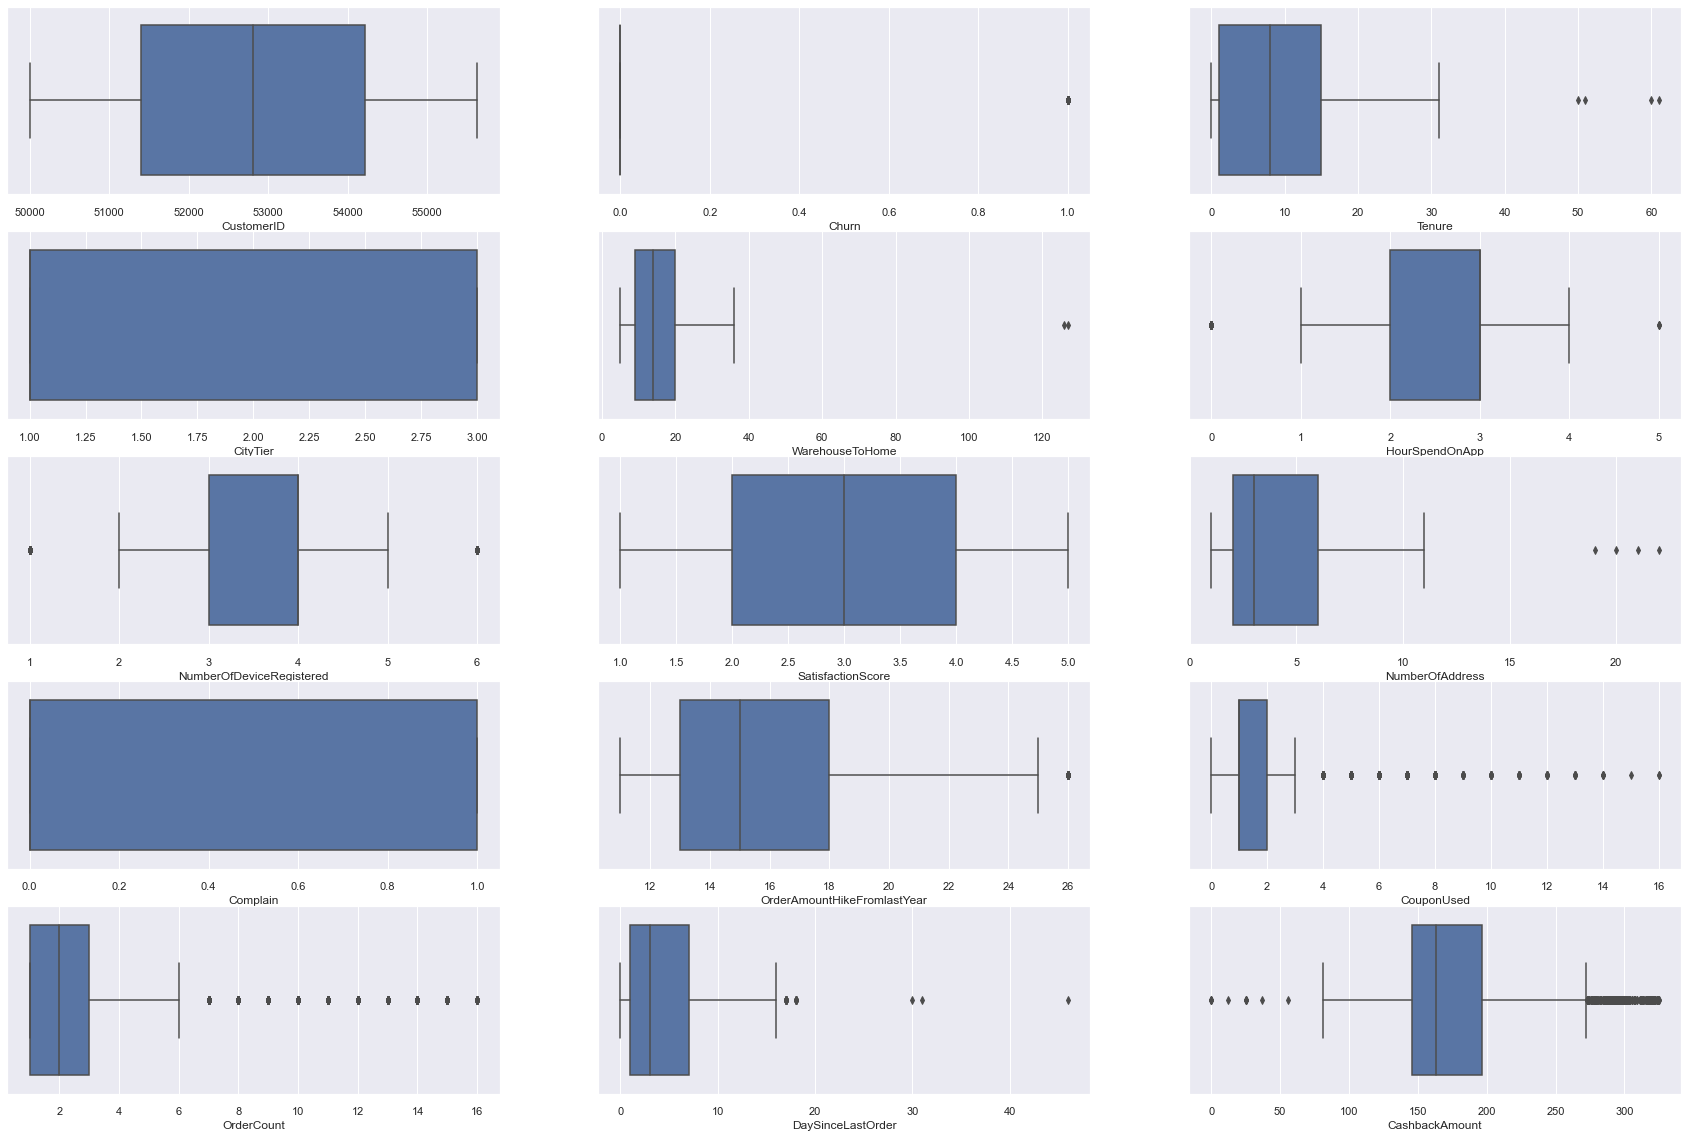

In [416]:
plt.figure(figsize=(30,20))
for i in range(len(numerikal)):
    plt.subplot(5,3,i+1)
    sns.boxplot(ecom[numerikal[i]])
    plt.tight_layout
plt.show()

dari boxplot dan analisa lebih lanjut mengenai variabel tersebut maka berikut variabel yang memiliki nilai outlier tetapi perlu dibuang dan tidak perlu dibuang
- Churn = karena label dan hanya binary tidak perlu dibuang
- Tenure = terdapat outlier pada angka 50 keatas, ada 2 kemungkinan, yang pertama memang tenure yang sangat tinggi (pelanggan lama sekali), yang kedua kemungkinan salah input. dan kali ini saya akan menganggap itu adalah salah input seharusnya nilai tidak sebesar itu sehingga baris tersebut akan saya hapus
- warehouse to home = sama dengan tenure kemungkinan ada customer yang rumahnya sangat jauh, atau salah memasukkan data. saya lebih memilih untuk removing baris yang outlier pada variabel ini
- hourspend on app = saya memutuskan untuk tidak remove baris outlier pada variabel ini karena mungkin saja nilainya 0 karena hanya mengunjungi applikasi dibawah 1 jam
- number of address = saya memutuskan untuk drop outlier pada variabel ini karena tidak masuk akal saja ada yang menambahkan alamat hingga 18 keatas, ada kemungkinan salah input
- order amount hike from lastyear = perlu remove outlier
- coupon used = perlu analisa lanjut
- order count = perlu analisa lanjut
- dayscincelas order
- cashback amount

CustomerID


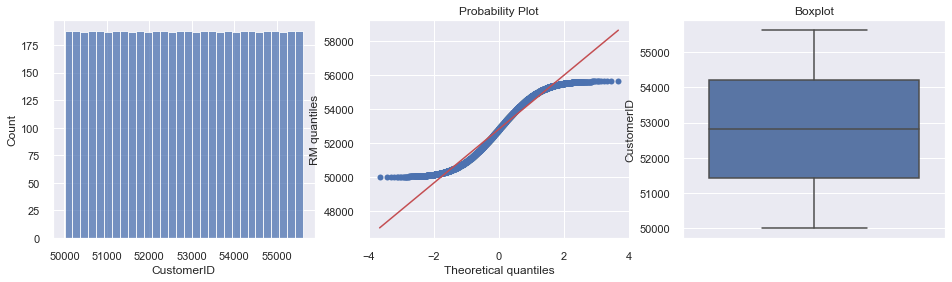

Churn


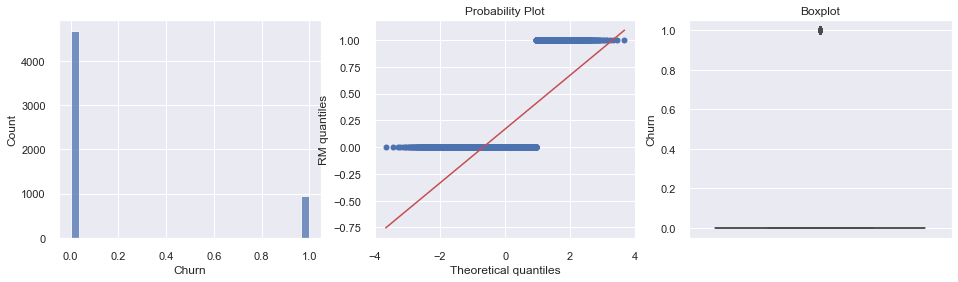

Tenure


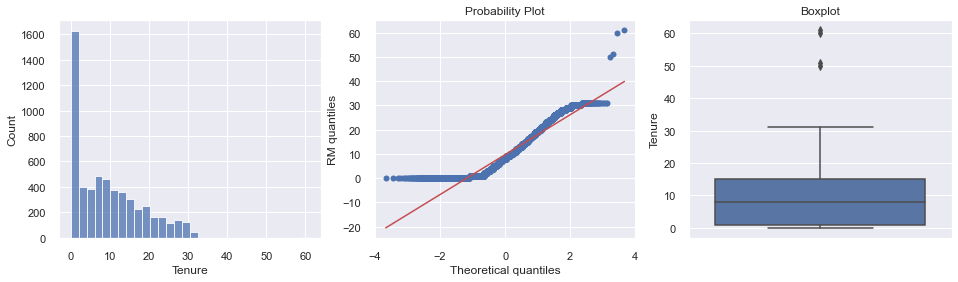

CityTier


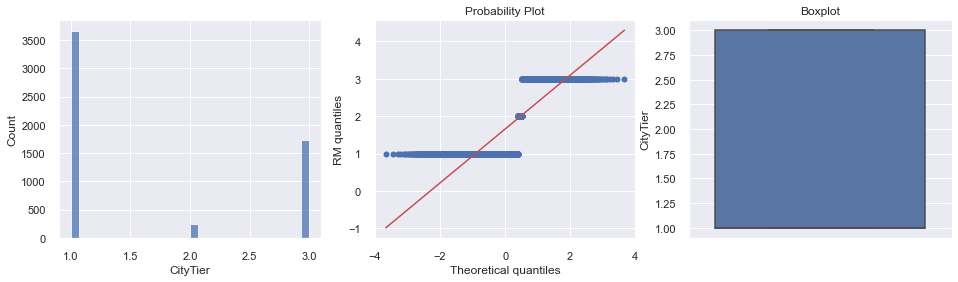

WarehouseToHome


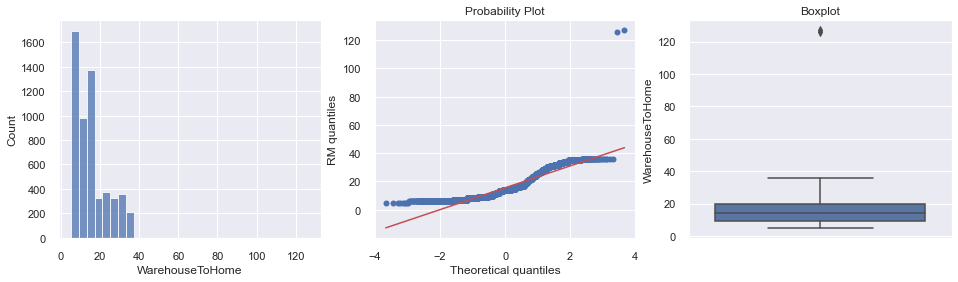

HourSpendOnApp


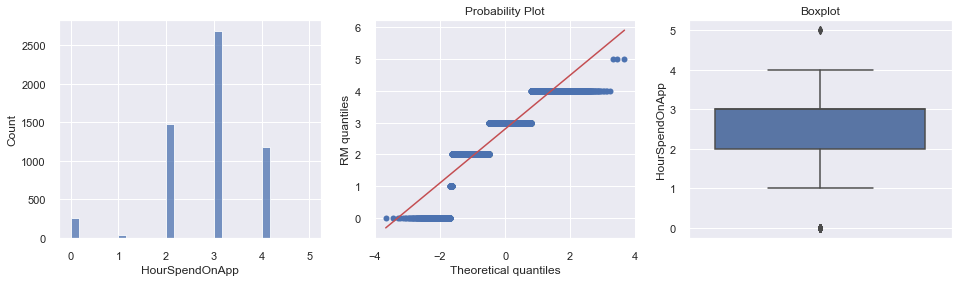

NumberOfDeviceRegistered


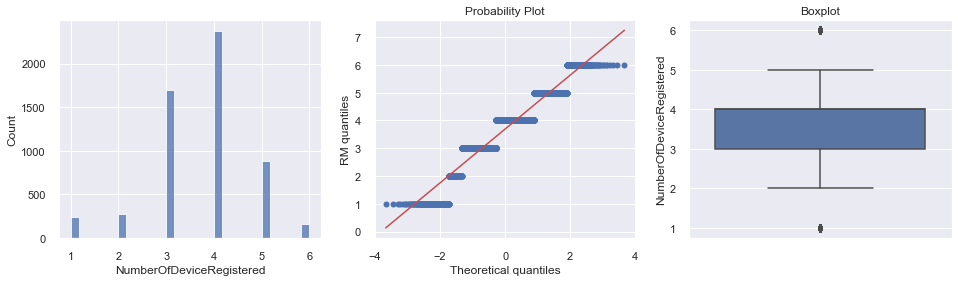

SatisfactionScore


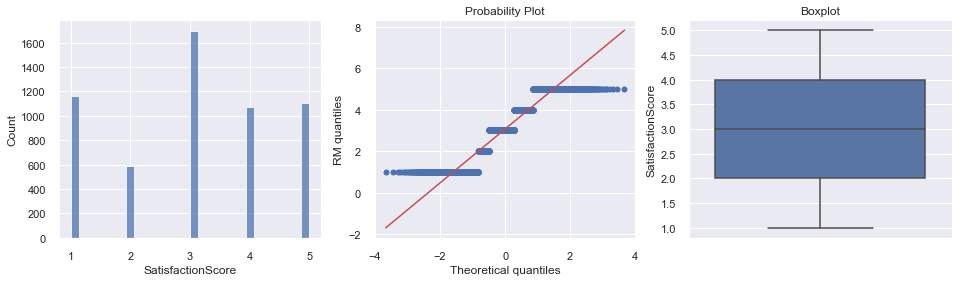

NumberOfAddress


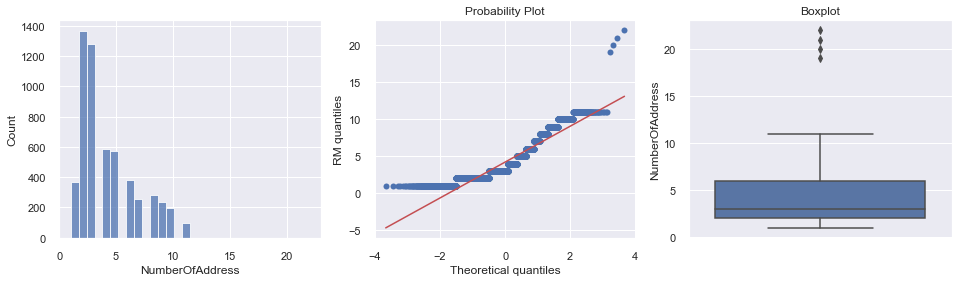

Complain


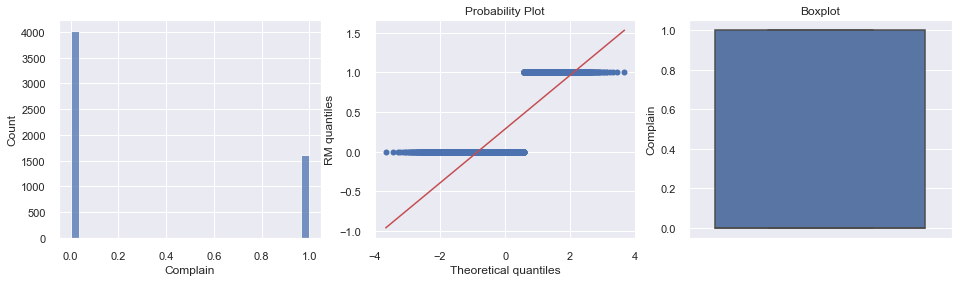

OrderAmountHikeFromlastYear


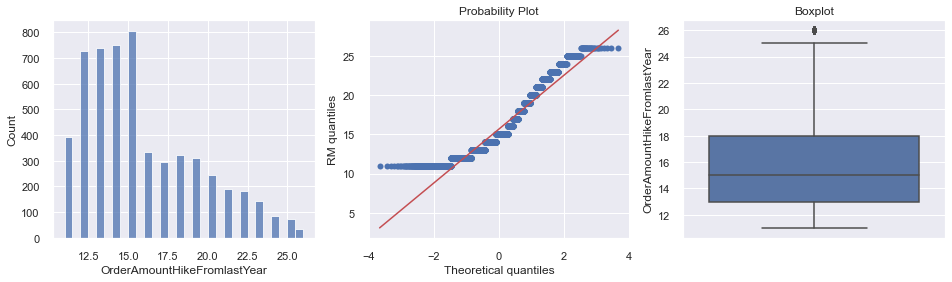

CouponUsed


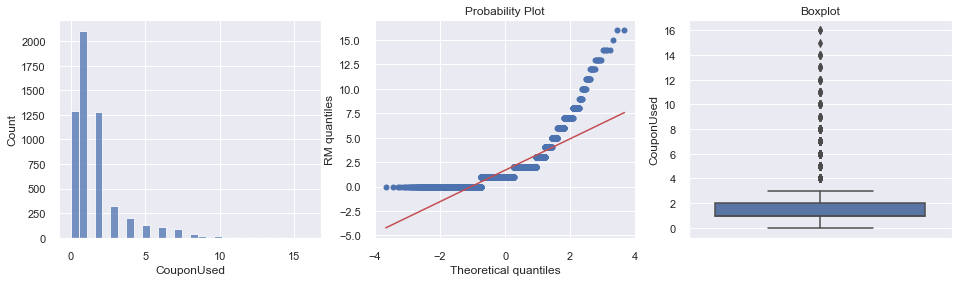

OrderCount


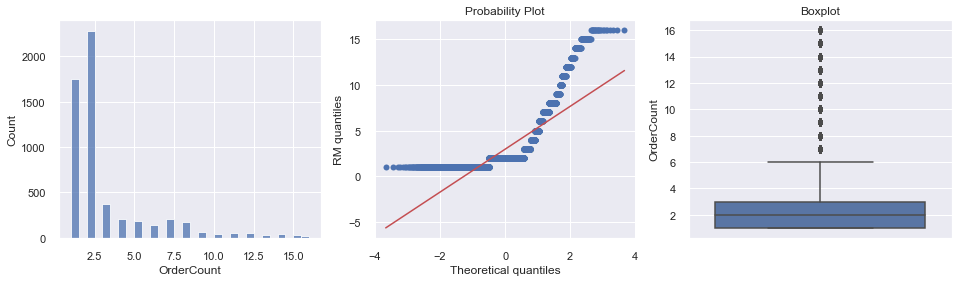

DaySinceLastOrder


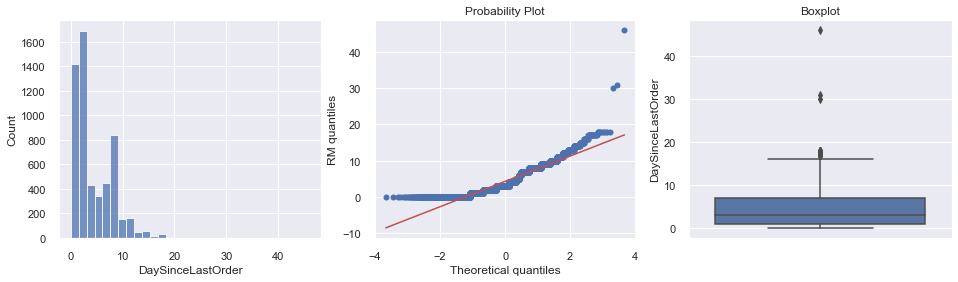

CashbackAmount


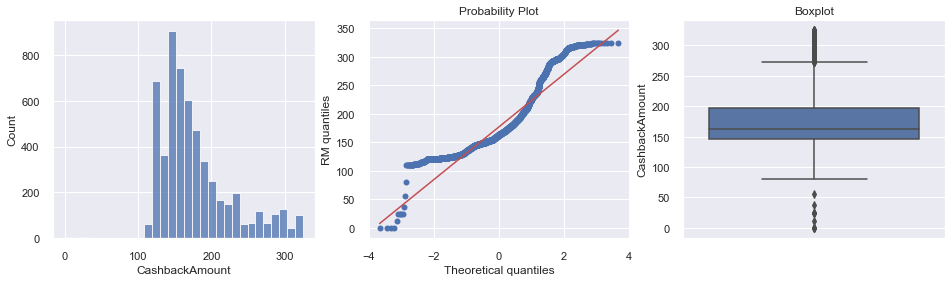

In [417]:
for col in numerikal:
    print(col)
    diagnostic_plots(ecom, col)

In [418]:
ecom.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [419]:
drop_outlier = [
    'Tenure',
    'WarehouseToHome',
    'NumberOfAddress',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder',
    'CashbackAmount'
]

In [420]:
# before handling outlier
ecom.shape

(5630, 20)

In [421]:
for col in drop_outlier:
    mean = ecom[col].mean()
    std = ecom[col].std()
    limit = 3*std
    limit_atas = mean + 3*std
    limit_bawah = mean - 3*std
    ecom.drop(ecom.index[ecom[col]> limit_atas] | ecom.index[ecom[col]<limit_bawah], inplace=True)
    

In [422]:
# after handling outlier
ecom.shape

(5226, 20)

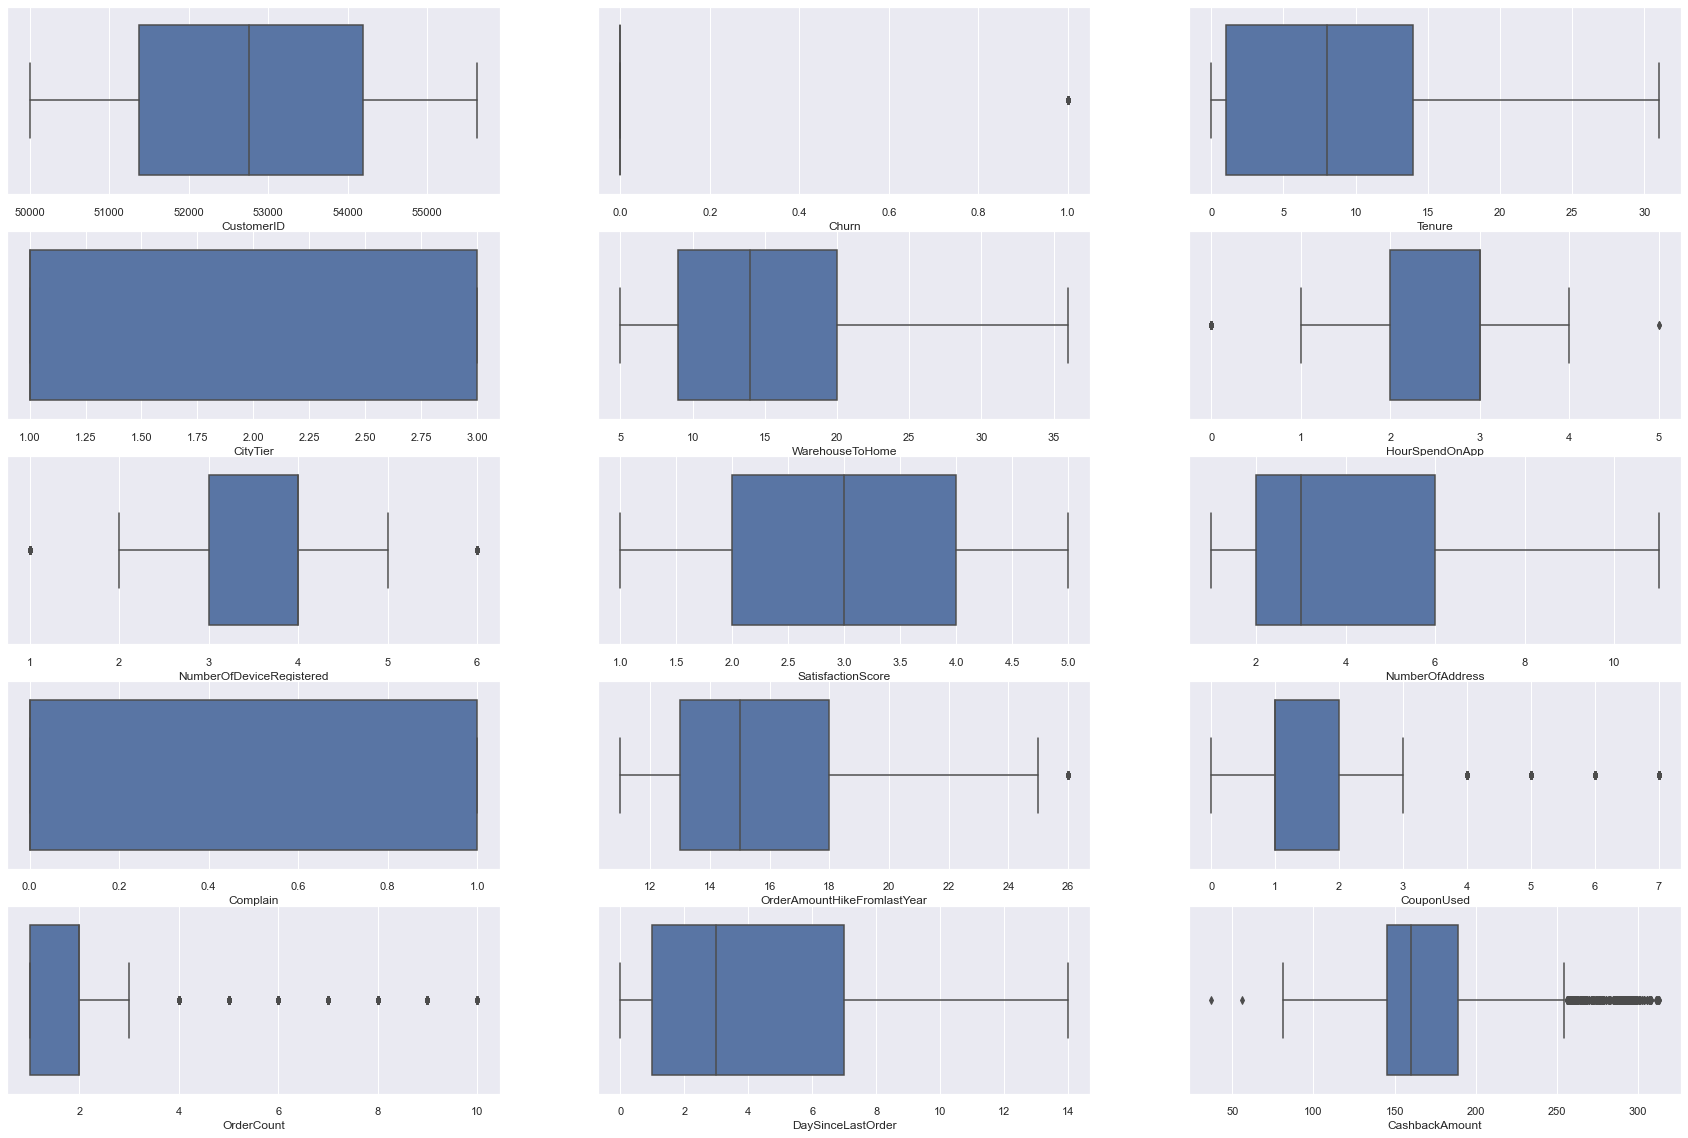

In [423]:
plt.figure(figsize=(30,20))
for i in range(len(numerikal)):
    plt.subplot(5,3,i+1)
    sns.boxplot(ecom[numerikal[i]])
    plt.tight_layout
plt.show()

# Feature selection (Numerikal Data)

<AxesSubplot:>

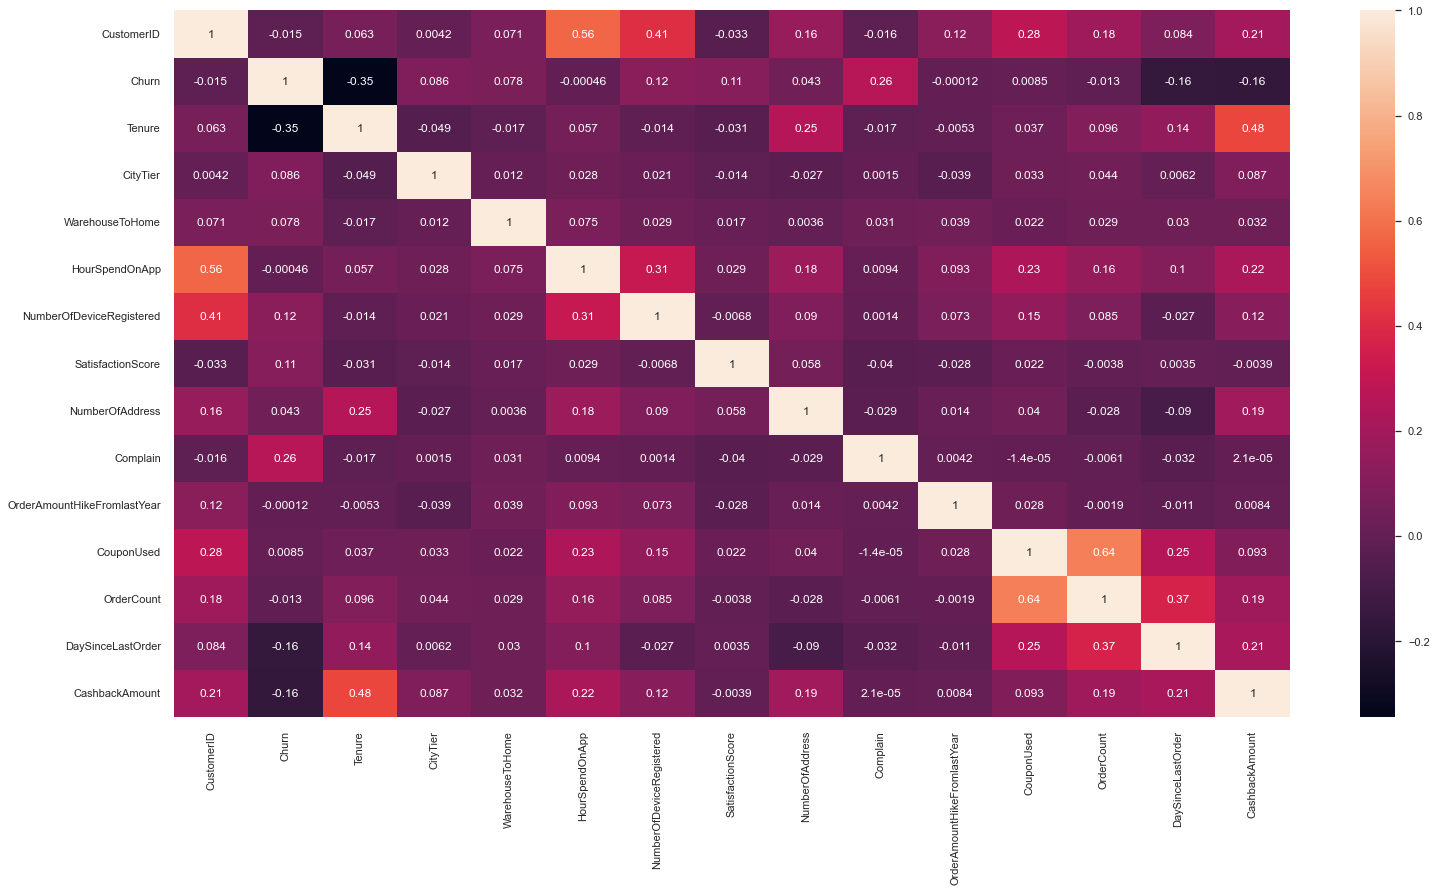

In [424]:
sns.set(rc = {'figure.figsize':(25,13)})
sns.heatmap(ecom.corr(), annot=True)

Variabel yang memiliki nilai uniq 2 atau 3 akan saya masukkan sebagai kategorikal data pada saat feature selection

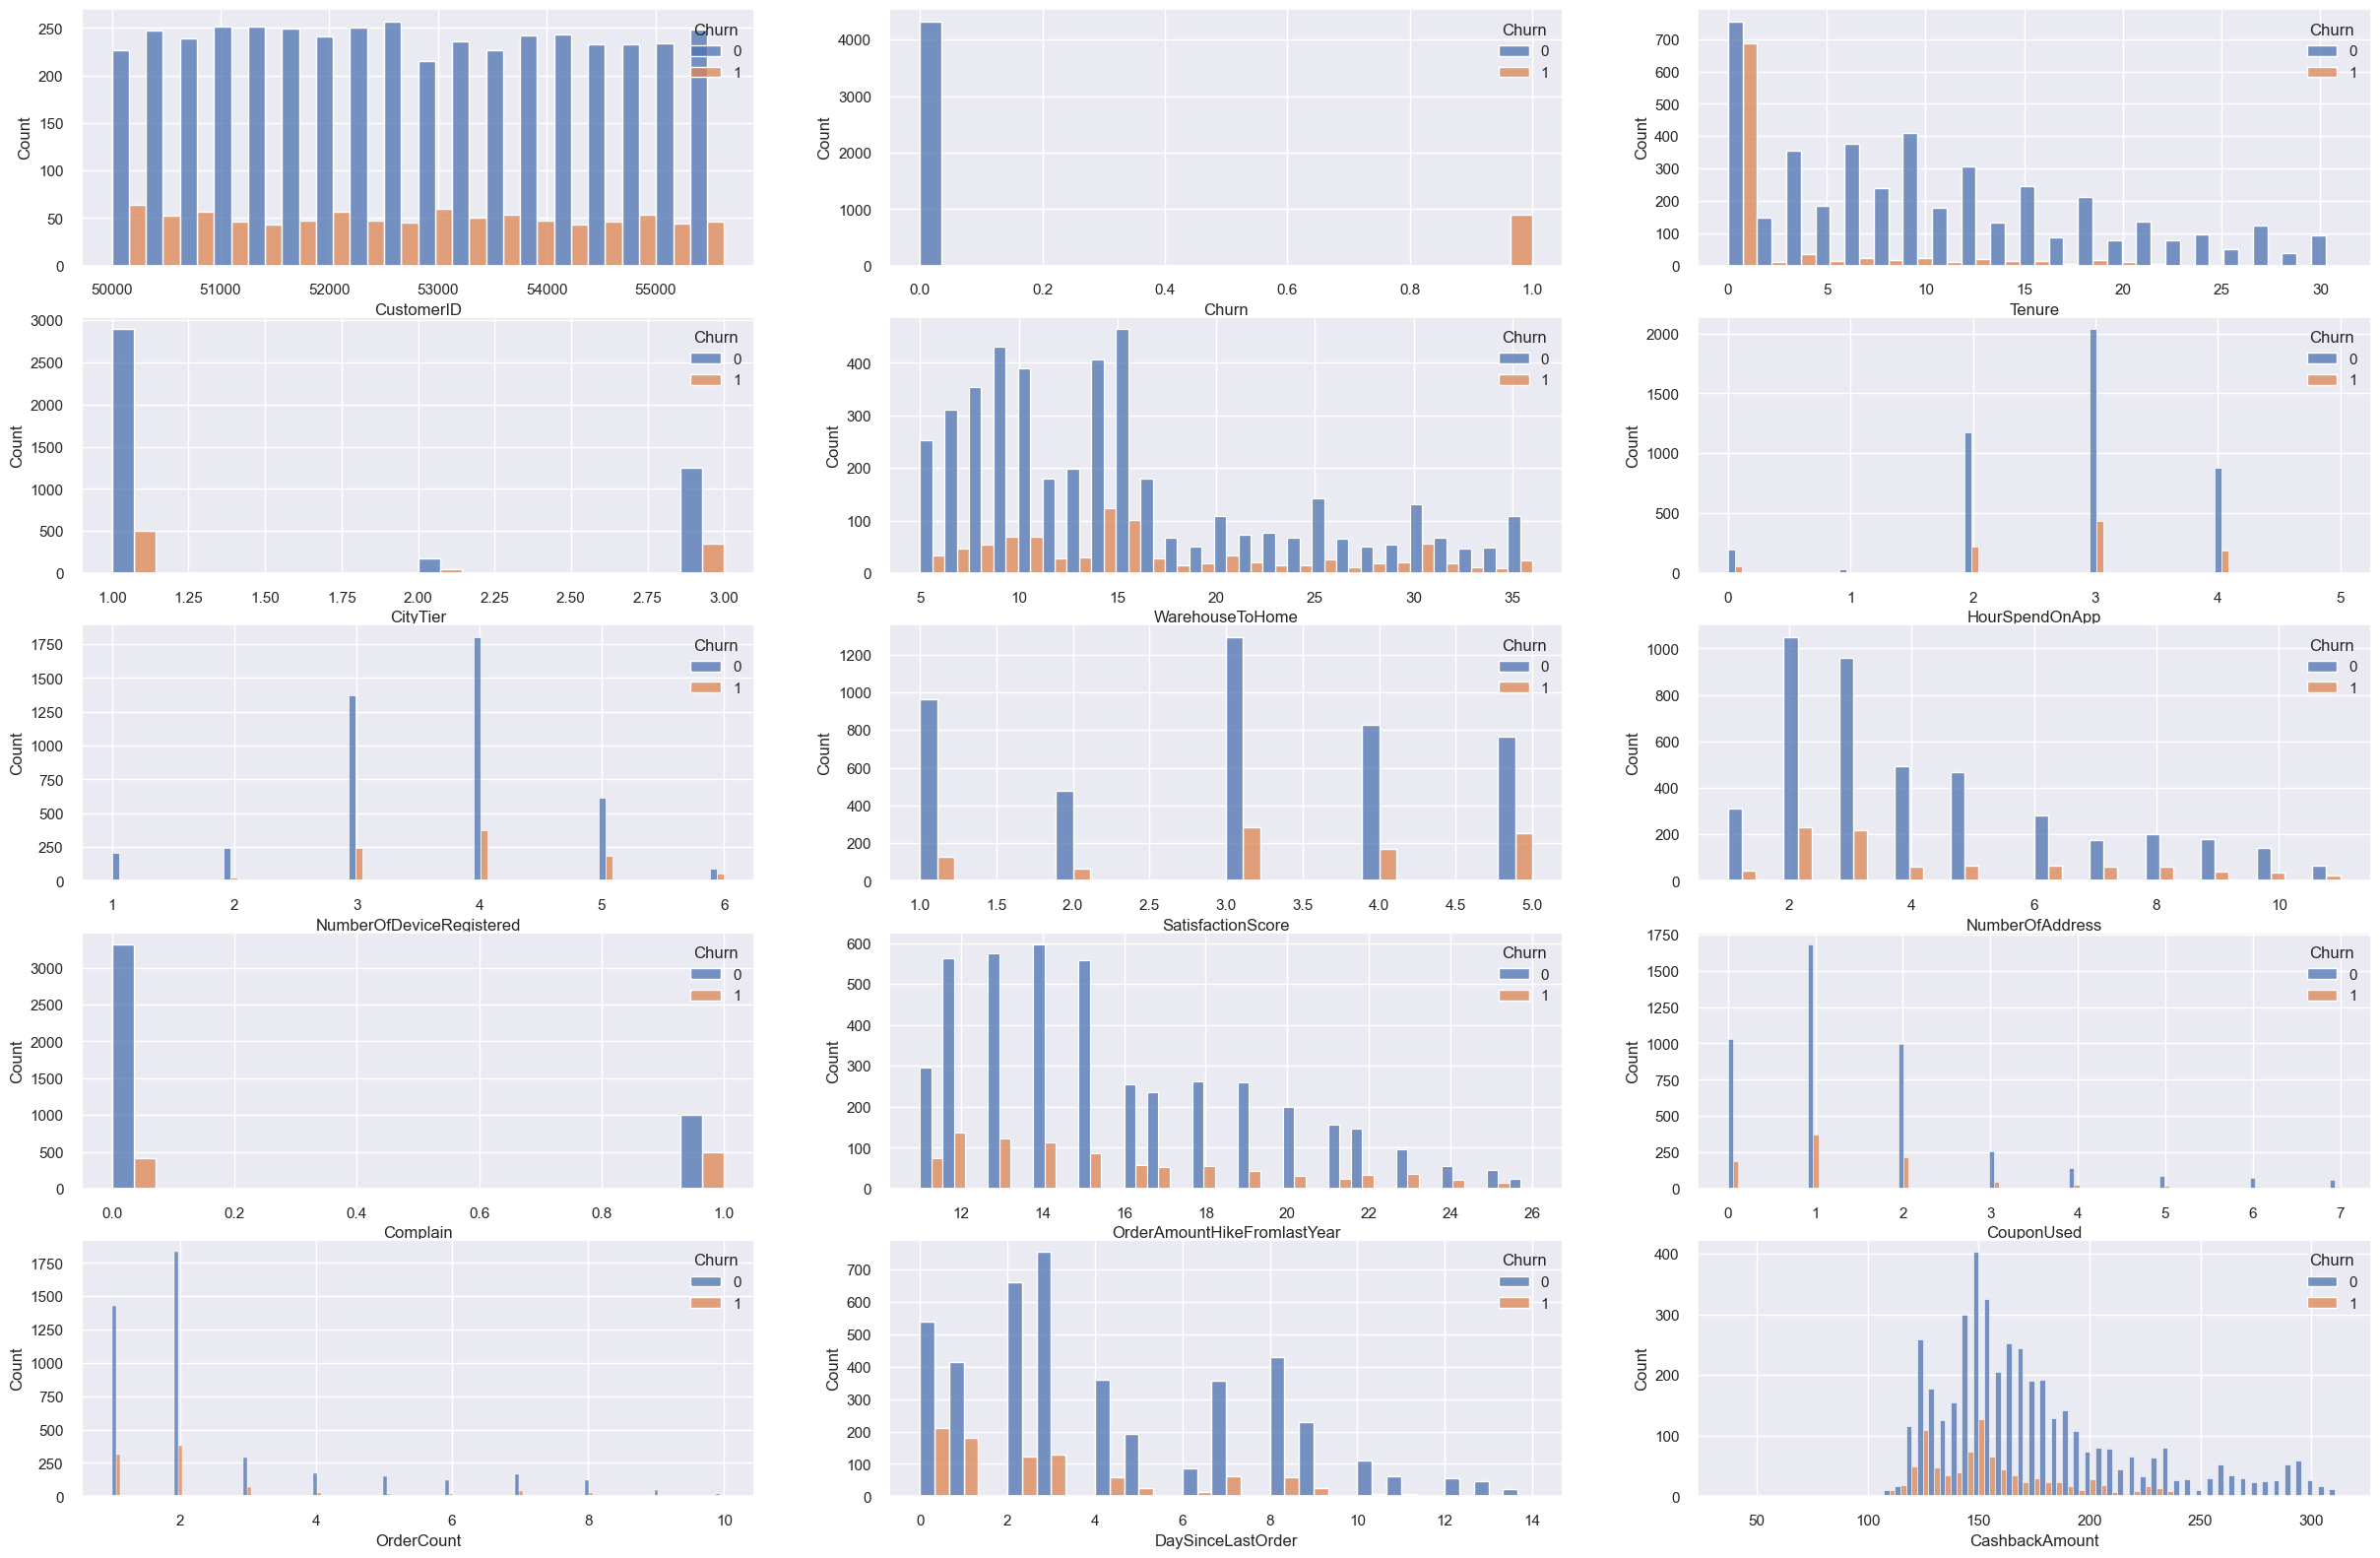

In [425]:
plt.figure(figsize=(30,20), dpi=100)
for i in range(len(numerikal)):
    plt.subplot(5,3,i+1)
    sns.histplot(data=ecom, x=ecom[numerikal[i]], hue='Churn', multiple='dodge')
    plt.tight_layout
plt.show()

Penjelasan
- Tenure = terdapat perbedaan tenura pada customer churn dan non-churn dimana customer churn terjadi ketika nilai tenure lebih kecil (pelanggan/customer yang lebih baru)
- Coupon used = customer yang churn berkumpul pada penggunaan kupon bulan lalu sekitar dibawah 4 (mungkin dari tim bisnis bisa lebih sering memberikan kupon pada customer yang berpotensi churn) 
- order count = customer yang churn berkumpul pada pesanan 1/2 pada bulan kemarin
- cashback amount = customer yang churn lebih memiliki rata" cashback lebih sedikit bisa dilihat pada persebaran datanya semua customer churn memiliki cashback rata" dibawah 250

### Membagi bila skew tinggi menggunakan anova, bila skew rendah dan berdistribusi normal menggunakan t-test

In [426]:
using_ttest = []
using_anova = []
for col in numerikal:
    skewvalue = ecom[col].skew(axis=0, skipna=True)
    if skewvalue <1 and skewvalue > -1:
        print('Distribusi Normal atau skew tidak parah')
        print('Nilai Skew : ',skewvalue)
        print(col, ": T-TEST")
        using_ttest.append(col)
        print('------------------------------------------------------------------------')
    else:
        print('Tidak berdistribusi Normal, menggunakan anova')
        print('Nilai Skew : ',skewvalue)
        print(col, ": ANOVA")
        using_anova.append(col)
        print('------------------------------------------------------------------------')

Distribusi Normal atau skew tidak parah
Nilai Skew :  0.027676463155747195
CustomerID : T-TEST
------------------------------------------------------------------------
Tidak berdistribusi Normal, menggunakan anova
Nilai Skew :  1.733239490819445
Churn : ANOVA
------------------------------------------------------------------------
Distribusi Normal atau skew tidak parah
Nilai Skew :  0.7872569814179642
Tenure : T-TEST
------------------------------------------------------------------------
Distribusi Normal atau skew tidak parah
Nilai Skew :  0.7309361727103123
CityTier : T-TEST
------------------------------------------------------------------------
Distribusi Normal atau skew tidak parah
Nilai Skew :  0.9277393796695116
WarehouseToHome : T-TEST
------------------------------------------------------------------------
Distribusi Normal atau skew tidak parah
Nilai Skew :  -0.9877122000321574
HourSpendOnApp : T-TEST
------------------------------------------------------------------------

### T-Test sebagai perbandingan 

In [427]:
# Using T-TEST
feature_selection_ttest = []
def plotperbandingan(df, variabel):
    variabel =f'{variabel}'
    mean_churn = round(df[df['Churn']==1][variabel].mean(),2)
    mean_nonchurn = round(df[df['Churn']==0][variabel].mean(),2)
    
    sns.histplot(data=df, x=variabel, hue="Churn", kde=True, palette=['g', 'red'])
    
    plt.axvline(mean_churn, linestyle='--', color='red', label="mean_churn")
    plt.axvline(mean_nonchurn, linestyle='--', color='red', label="mean_nonchurn")
    
    plt.title(f'Sebaran {variabel} Rata-rata Churn : {mean_churn} \n rata-rata non-churn {mean_nonchurn}')
    plt.show()
    
    tenure_churn = df[df['Churn']==1][variabel]
    tenure_nonchurn = ecom[ecom['Churn']==0][variabel]
    t_stats, p =ttest_ind(tenure_churn, tenure_nonchurn)

    if p<0.05:
        print(f'Perbedaan signifikan karena p-value sebesar {p}')
        return feature_selection_ttest.append(variabel)
    else:
        print(f'Perbedaan tidak signifikan karena p-value sebesar {p}')
    

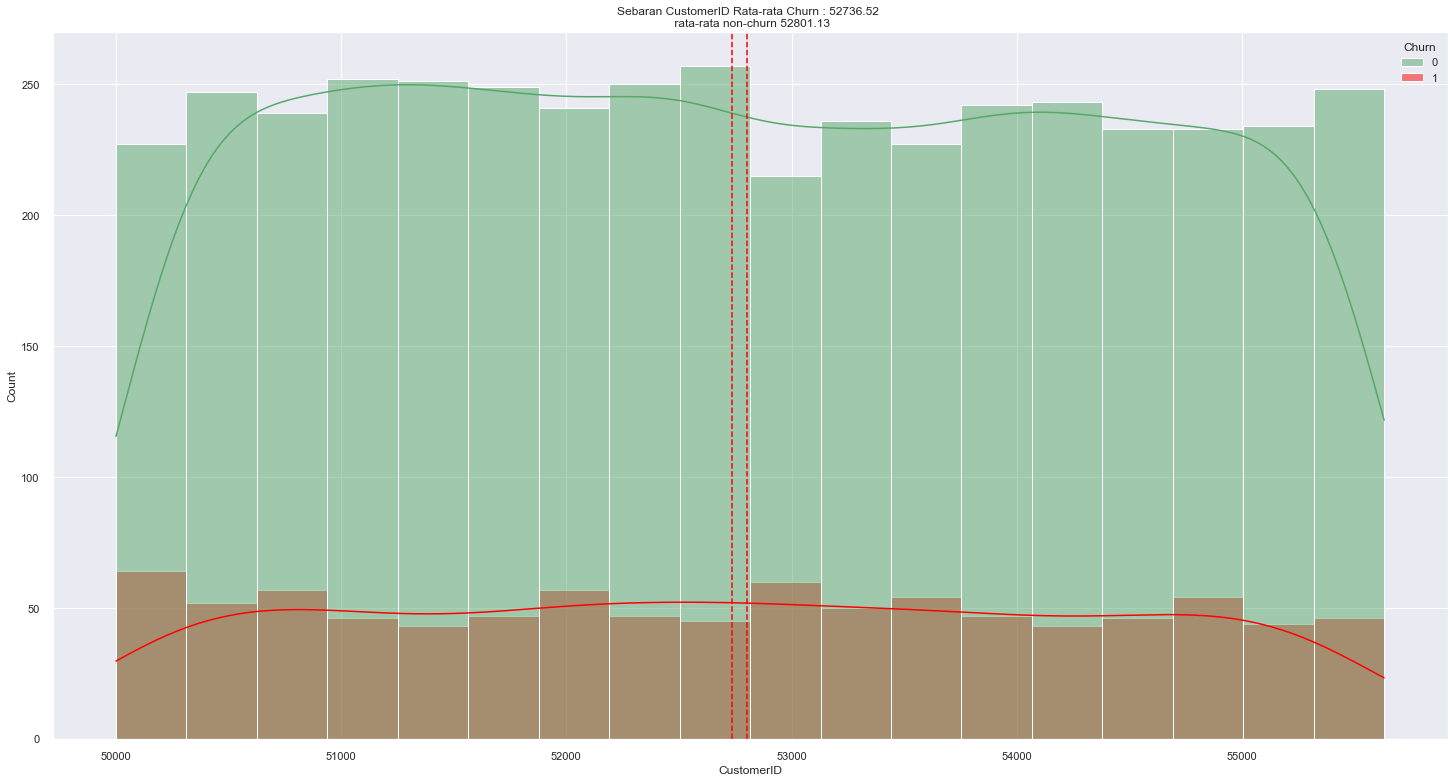

Perbedaan tidak signifikan karena p-value sebesar 0.27756556408653776


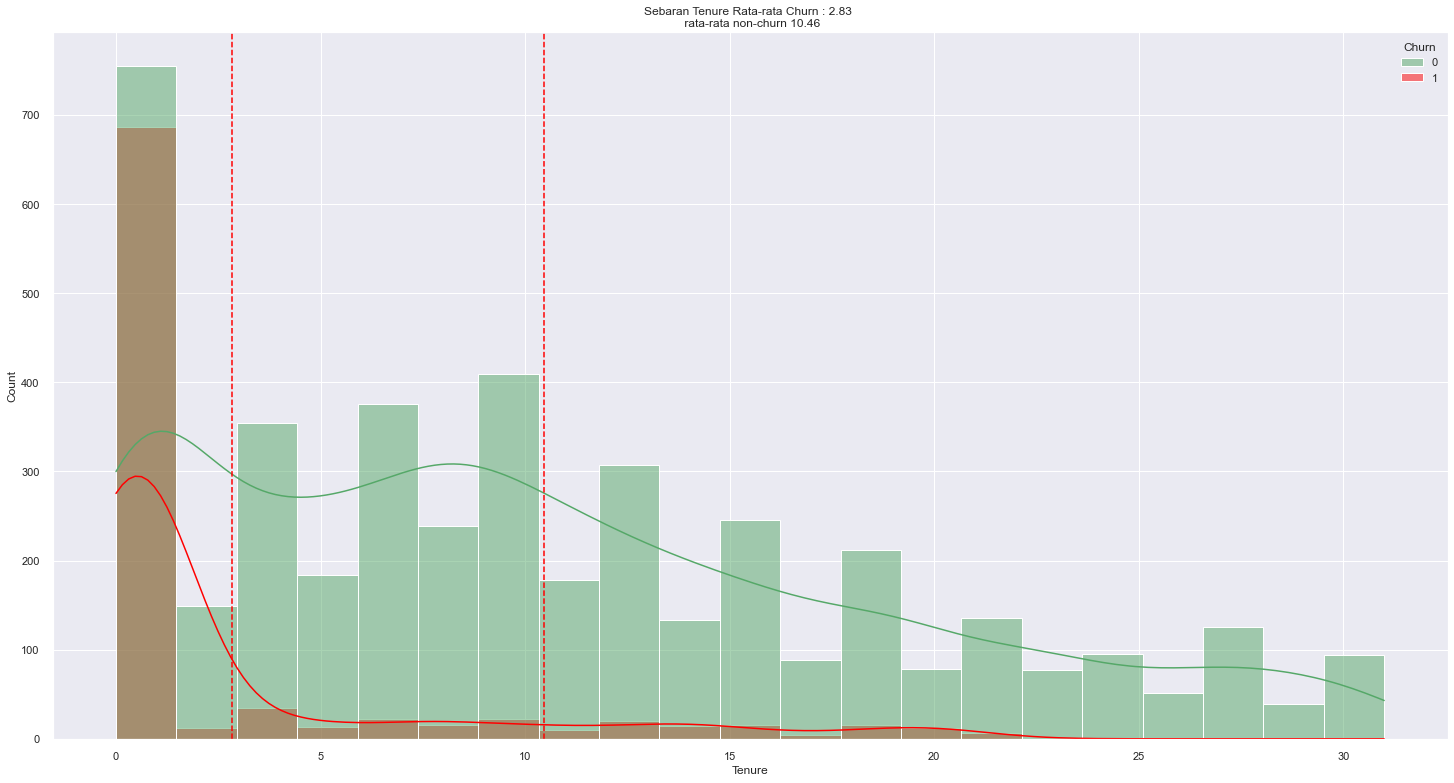

Perbedaan signifikan karena p-value sebesar 2.803167468847004e-146


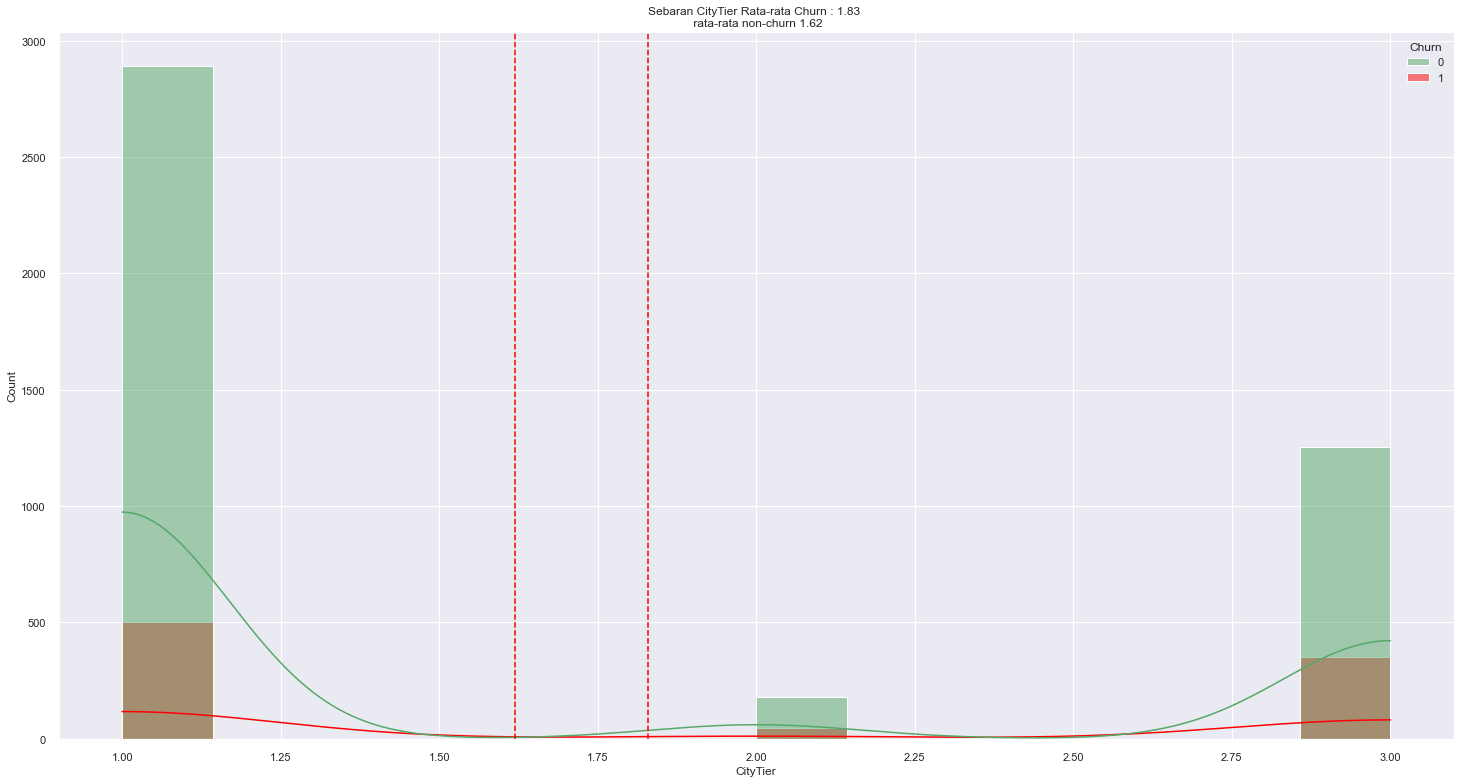

Perbedaan signifikan karena p-value sebesar 4.4194403849646237e-10


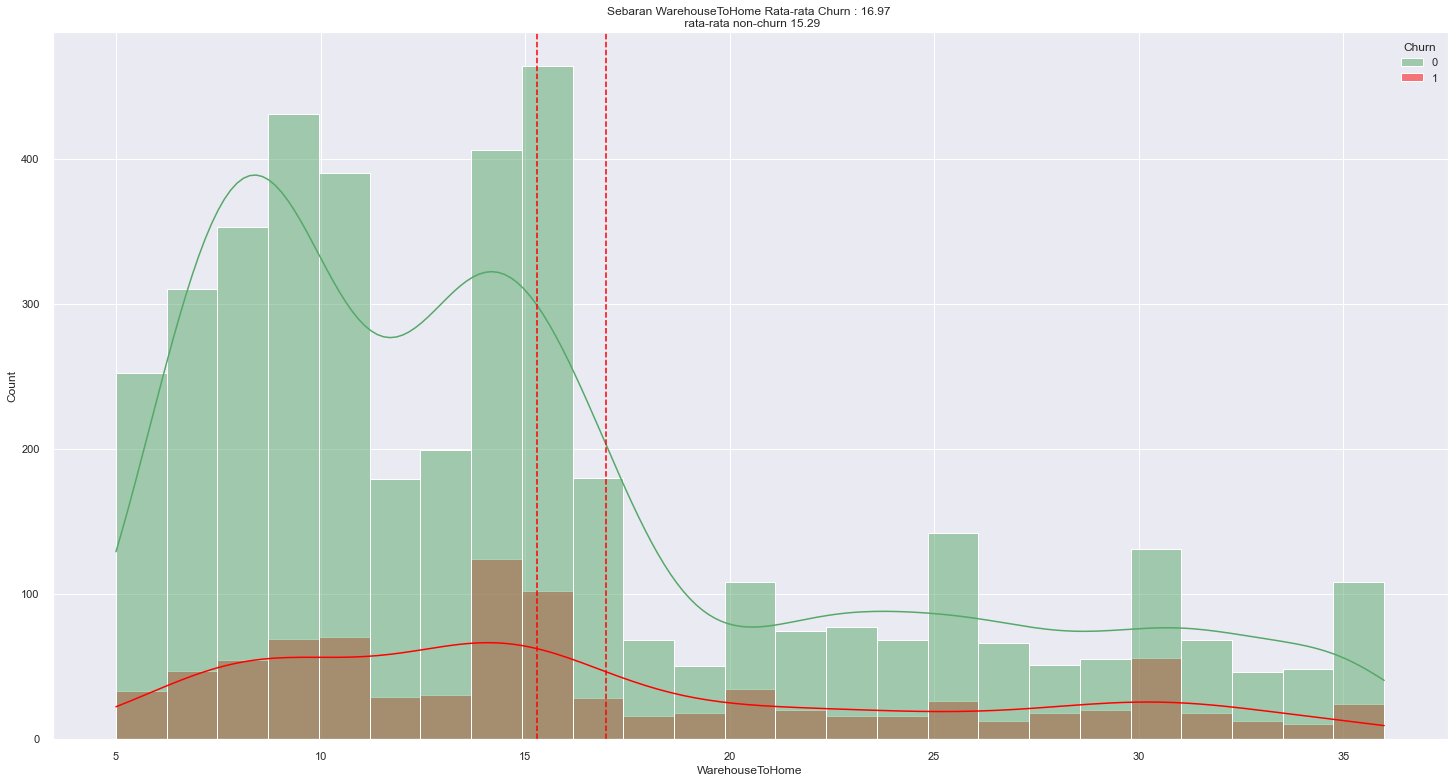

Perbedaan signifikan karena p-value sebesar 1.4074161244588265e-08


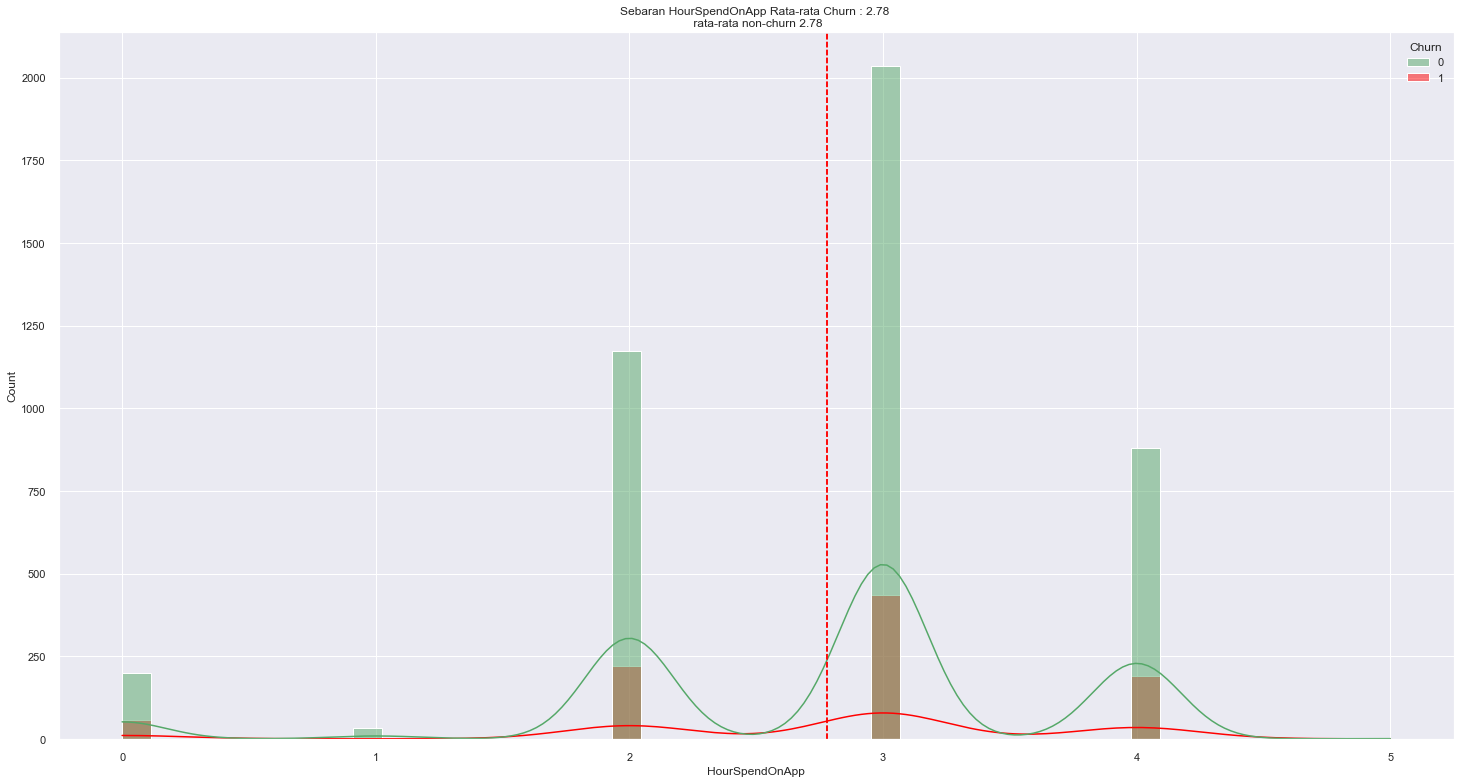

Perbedaan tidak signifikan karena p-value sebesar 0.973451283294244


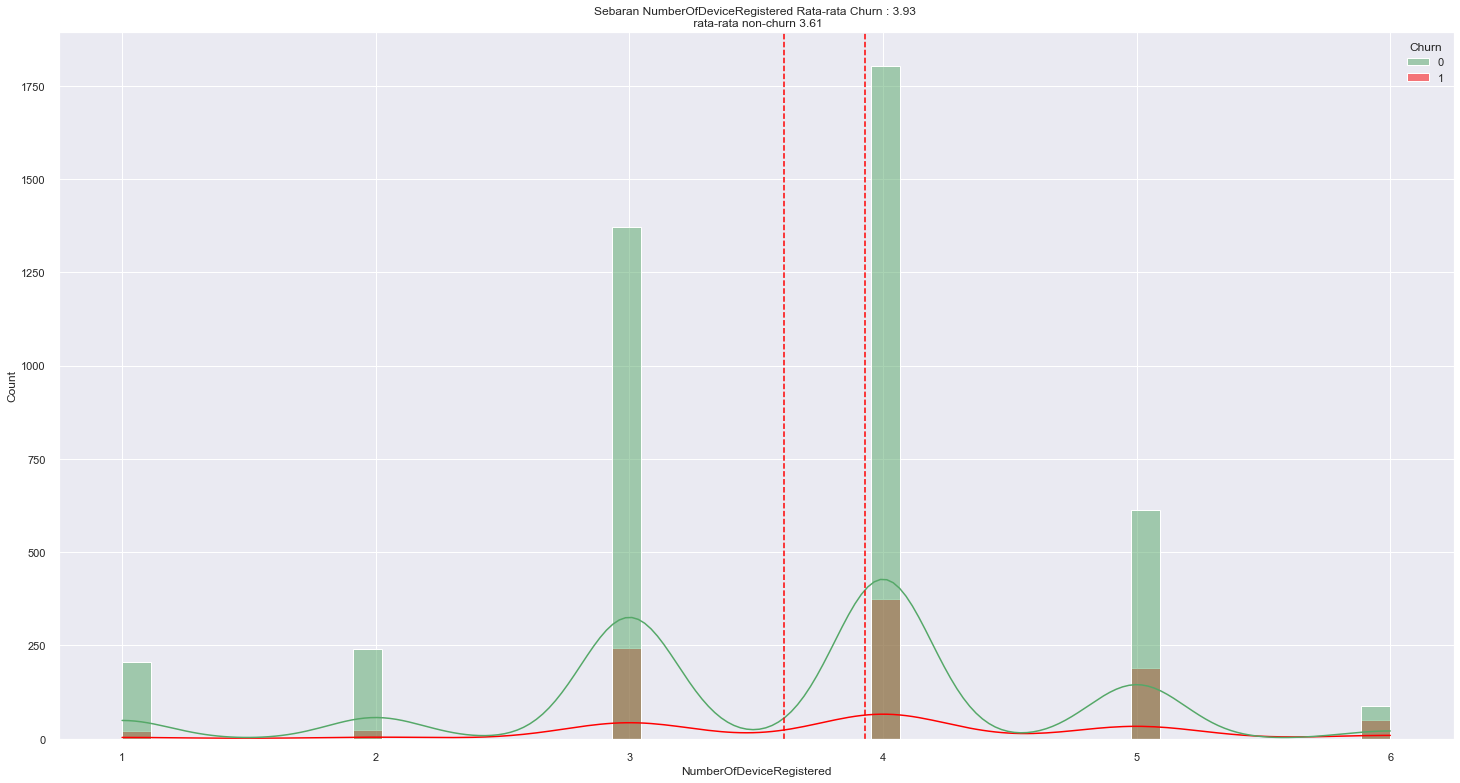

Perbedaan signifikan karena p-value sebesar 6.722357089897346e-18


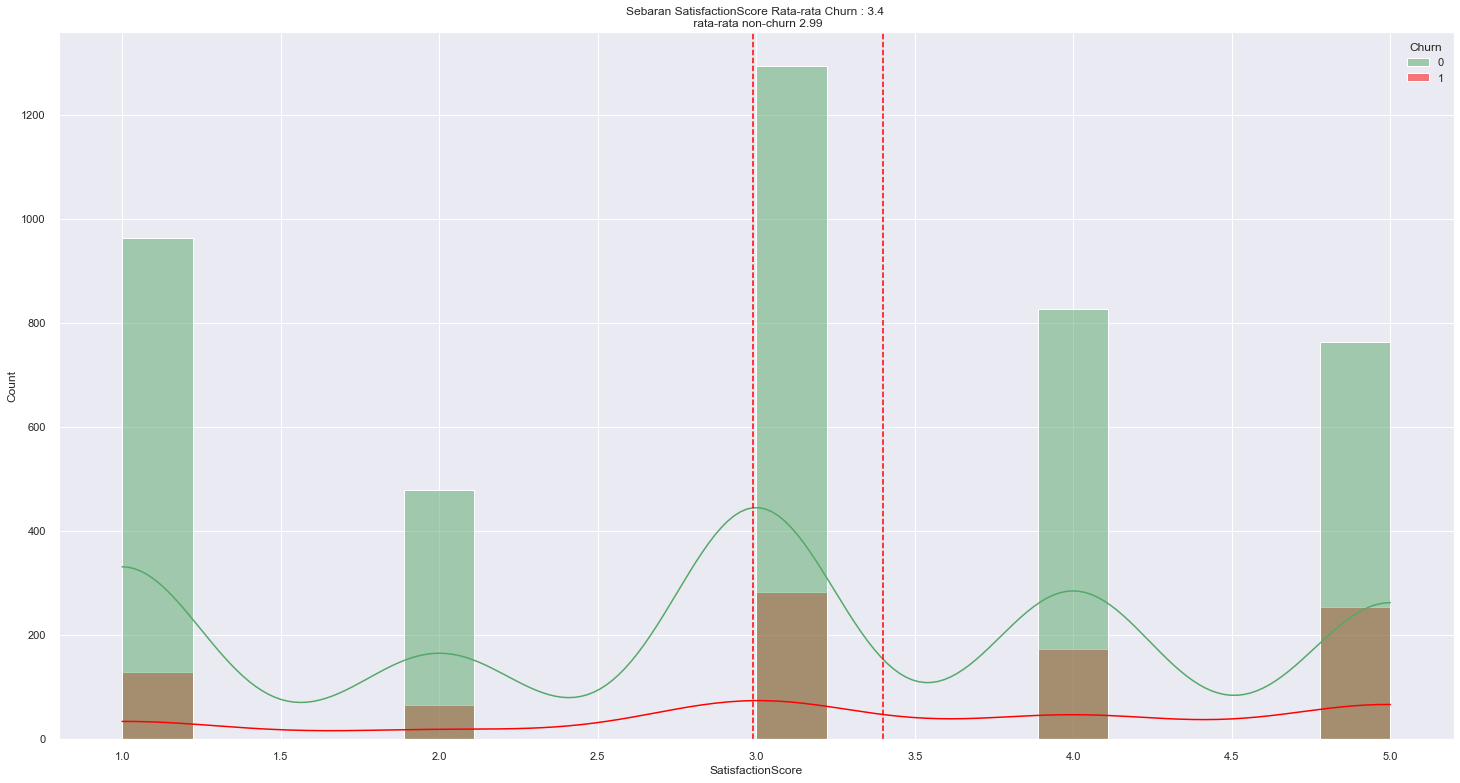

Perbedaan signifikan karena p-value sebesar 5.515015886628617e-16


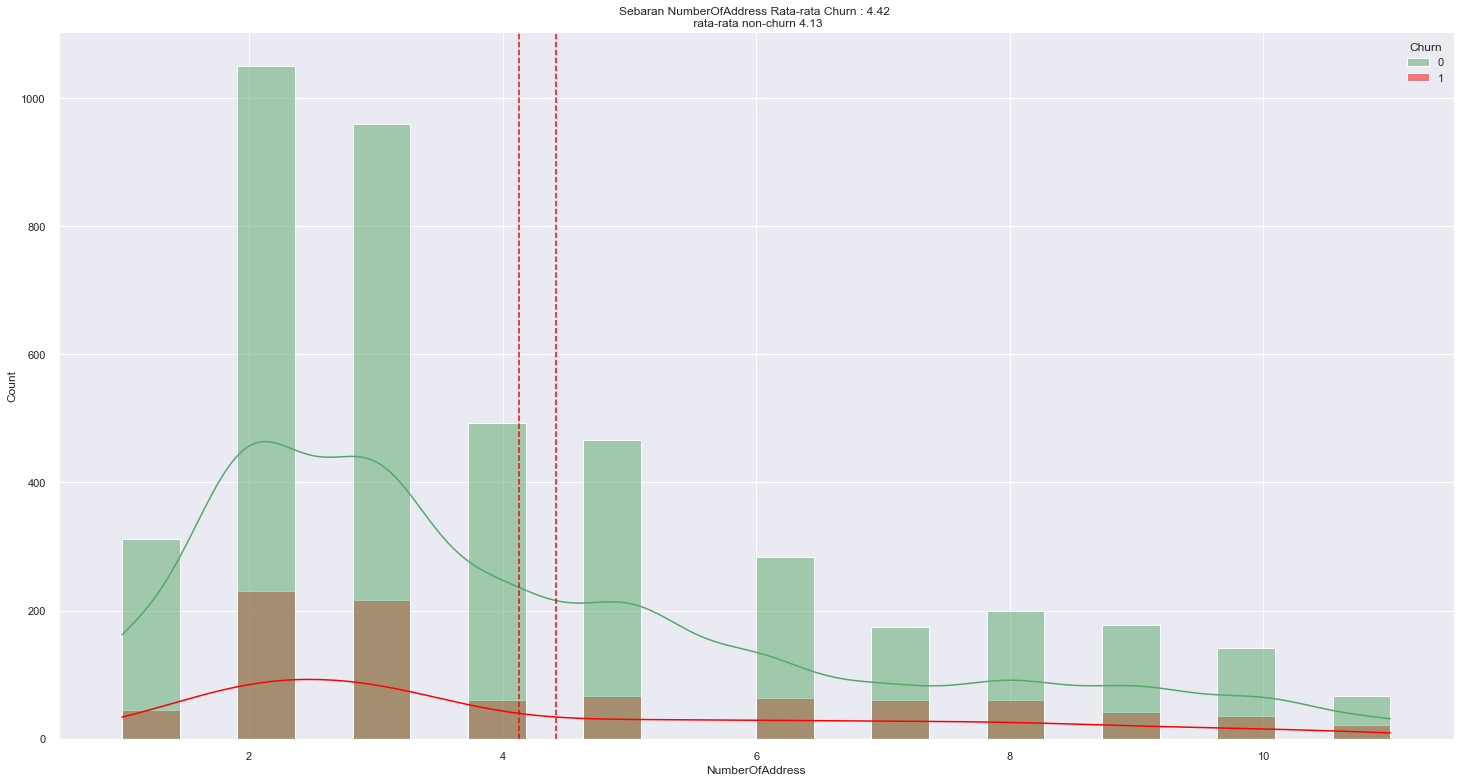

Perbedaan signifikan karena p-value sebesar 0.0019350390235714542


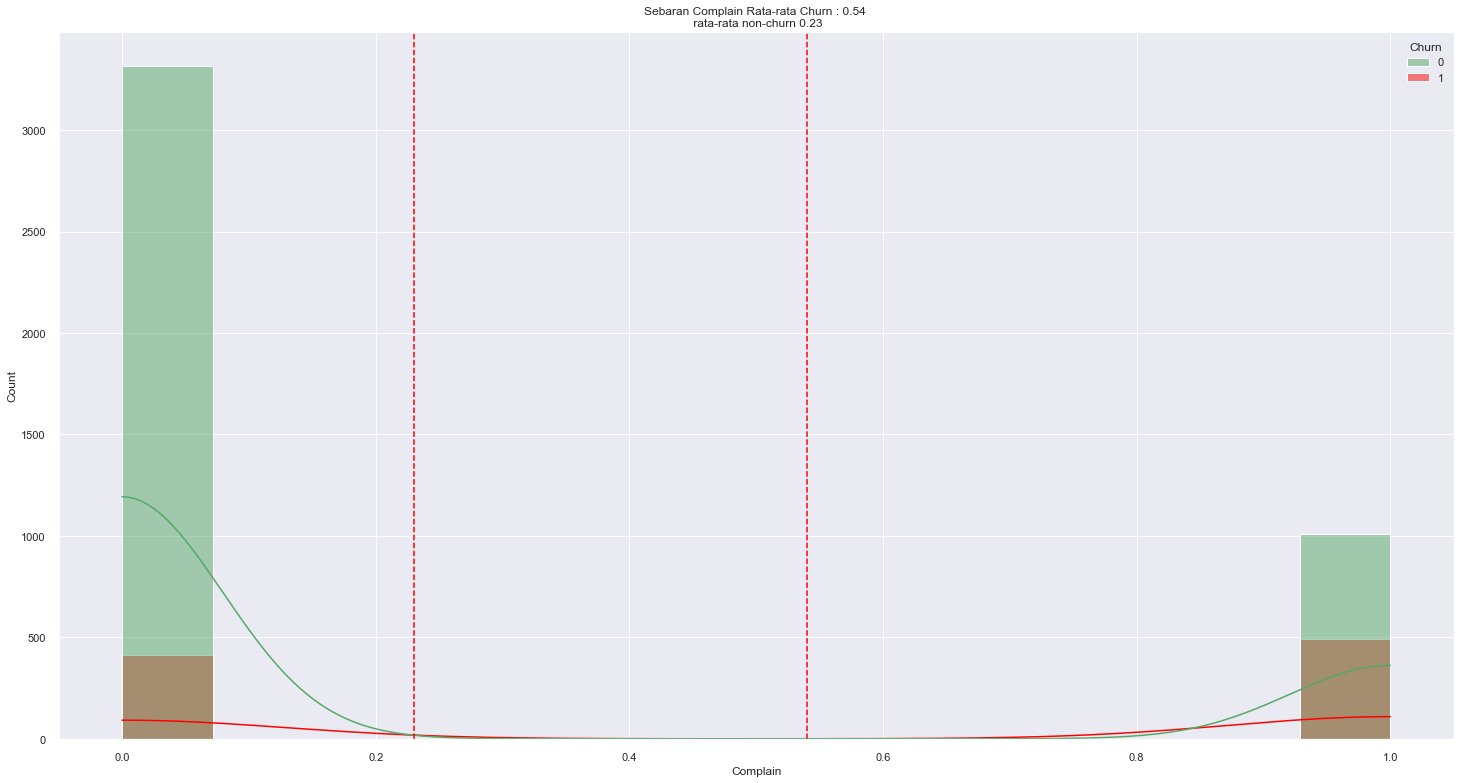

Perbedaan signifikan karena p-value sebesar 3.977383631407595e-81


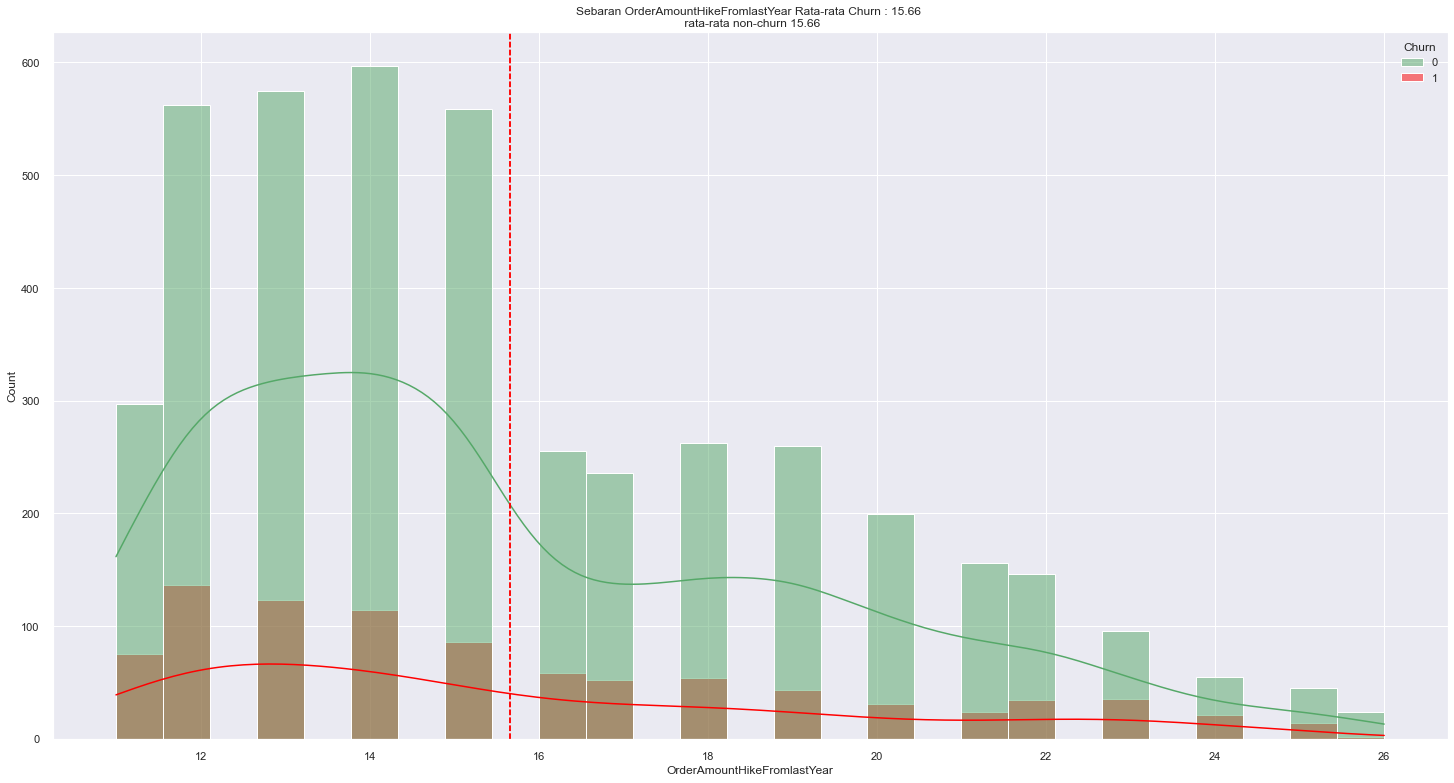

Perbedaan tidak signifikan karena p-value sebesar 0.9931152680514814


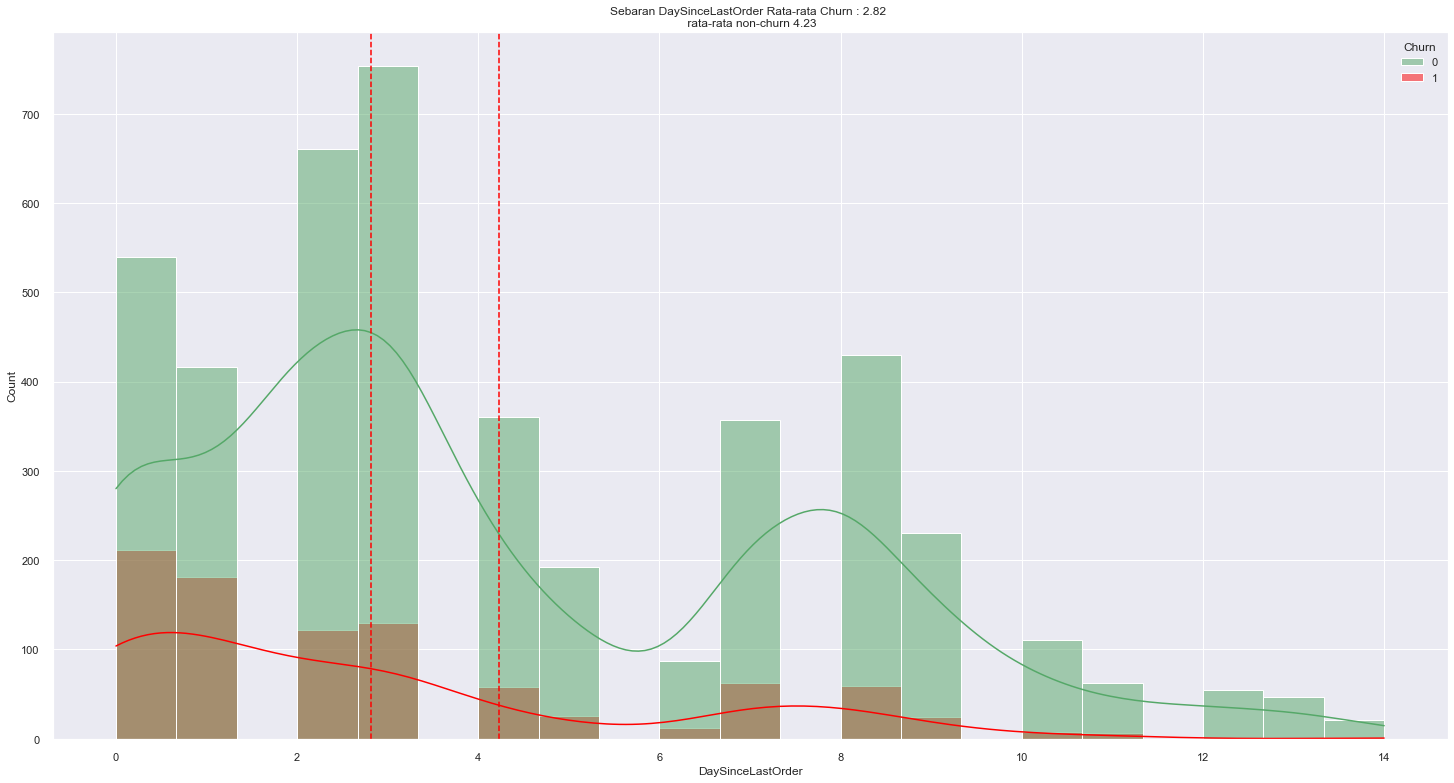

Perbedaan signifikan karena p-value sebesar 1.371501289049294e-31


In [428]:
for col in using_ttest:
    plotperbandingan(ecom, col)

### ANOVA sebagai perbandingan 

In [429]:
# Using ANOVA
feature_selection_anova = []
def plotperbandingananova(df, variabel):
    variabel =f'{variabel}'
    mean_churn = round(df[df['Churn']==1][variabel].mean(),2)
    mean_nonchurn = round(df[df['Churn']==0][variabel].mean(),2)
    
    sns.histplot(data=df, x=variabel, hue="Churn", kde=True, palette=['g', 'red'])
    
    plt.axvline(mean_churn, linestyle='--', color='red', label="mean_churn")
    plt.axvline(mean_nonchurn, linestyle='--', color='red', label="mean_nonchurn")
    
    plt.title(f'Sebaran {variabel} Rata-rata Churn : {mean_churn} \n rata-rata non-churn {mean_nonchurn}')
    plt.show()
    
    tenure_churn = df[df['Churn']==1][variabel]
    tenure_nonchurn = ecom[ecom['Churn']==0][variabel]
    f_stats, pvalue = f_oneway(tenure_churn, tenure_nonchurn)

    if pvalue<0.05:
        print(f'Perbedaan signifikan karena p-value sebesar {pvalue}')
        return feature_selection_anova.append(variabel)
    else:
        print(f'Perbedaan tidak signifikan karena p-value sebesar {pvalue}')
    

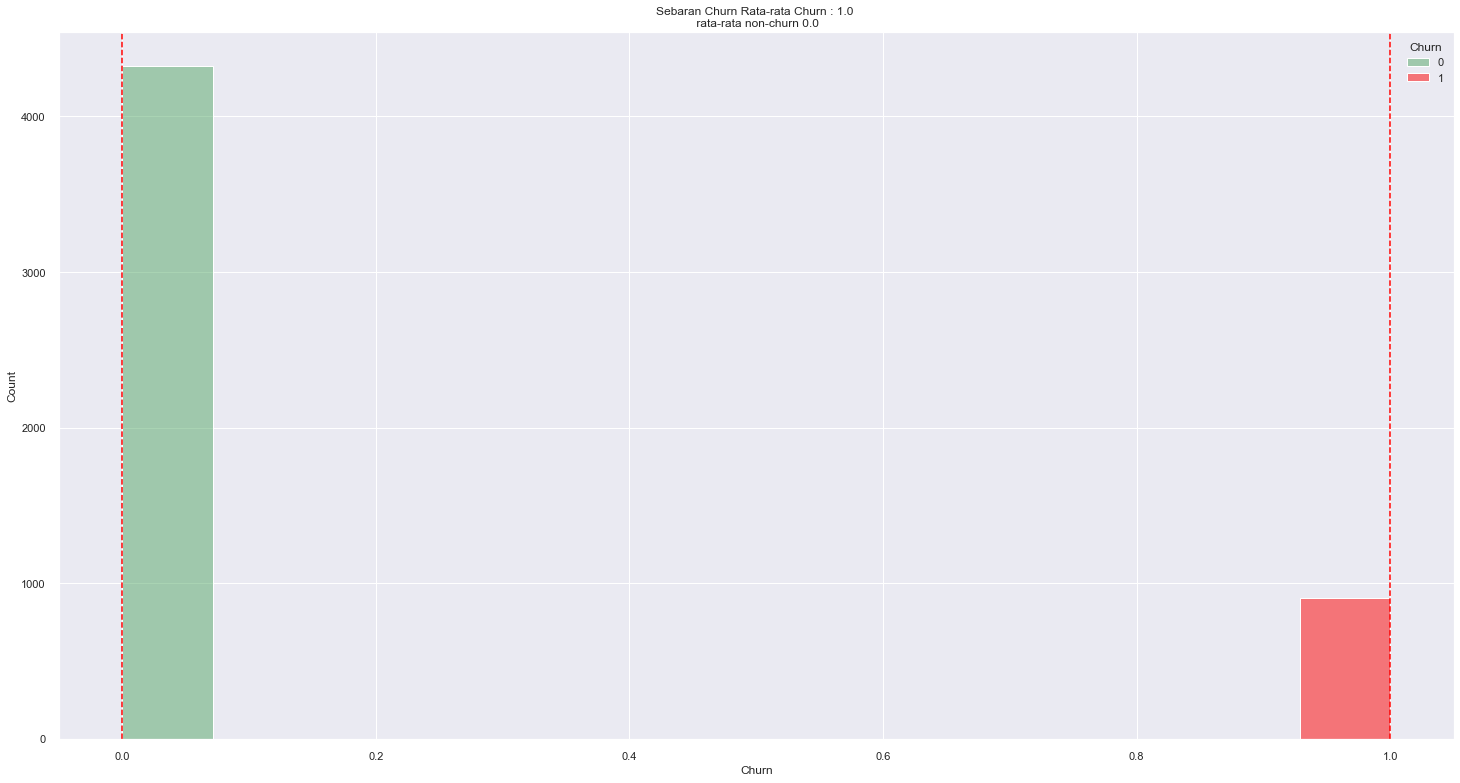

Perbedaan signifikan karena p-value sebesar 0.0


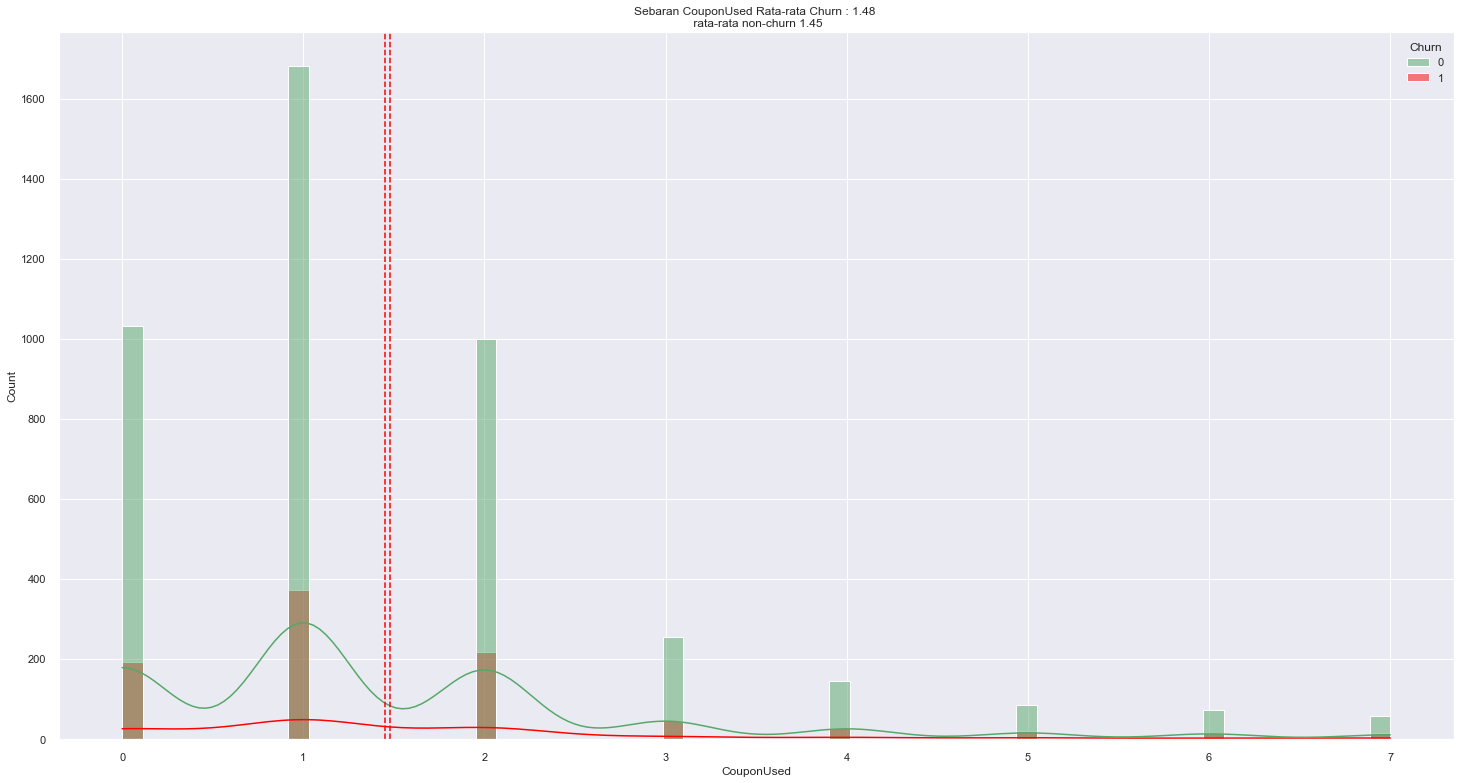

Perbedaan tidak signifikan karena p-value sebesar 0.5387460314744767


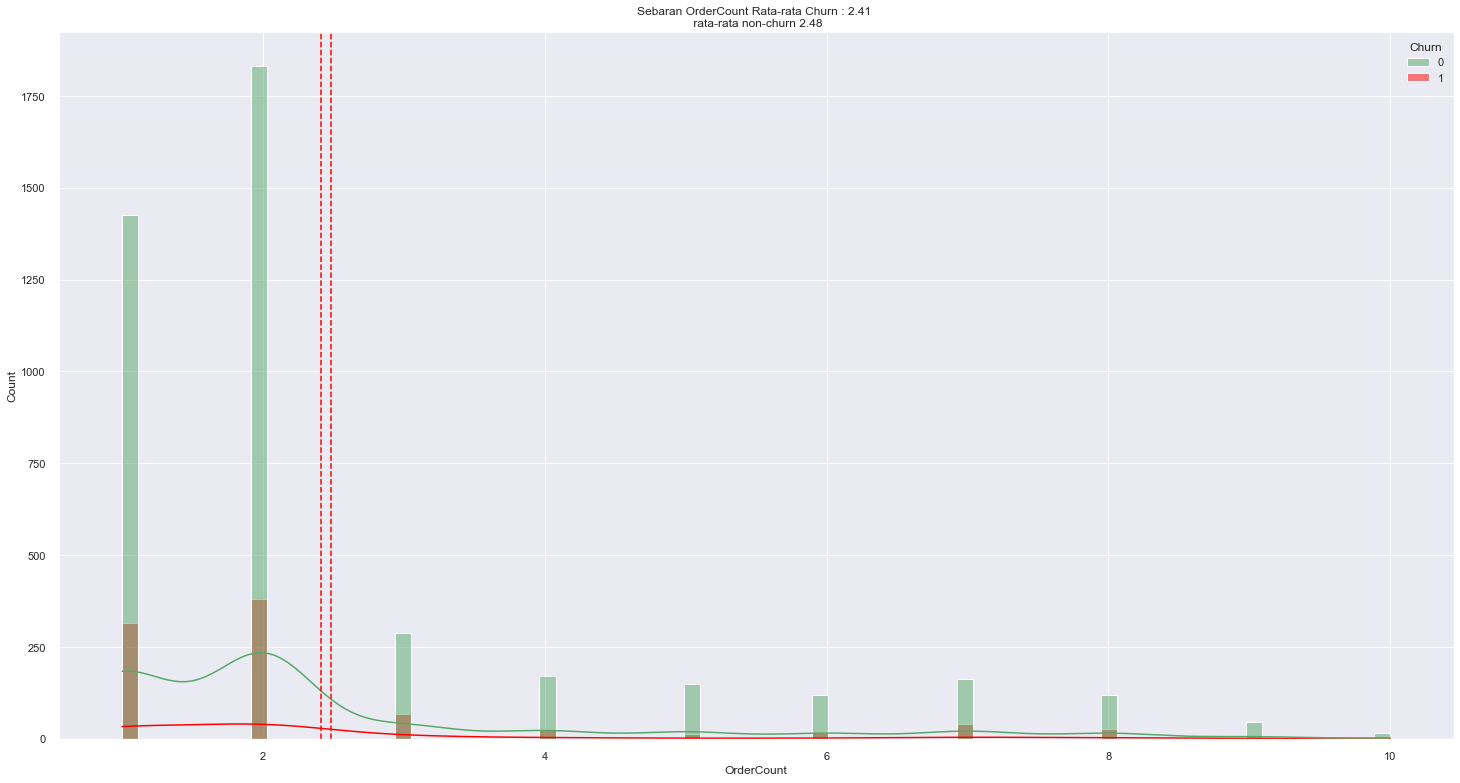

Perbedaan tidak signifikan karena p-value sebesar 0.33115447521029706


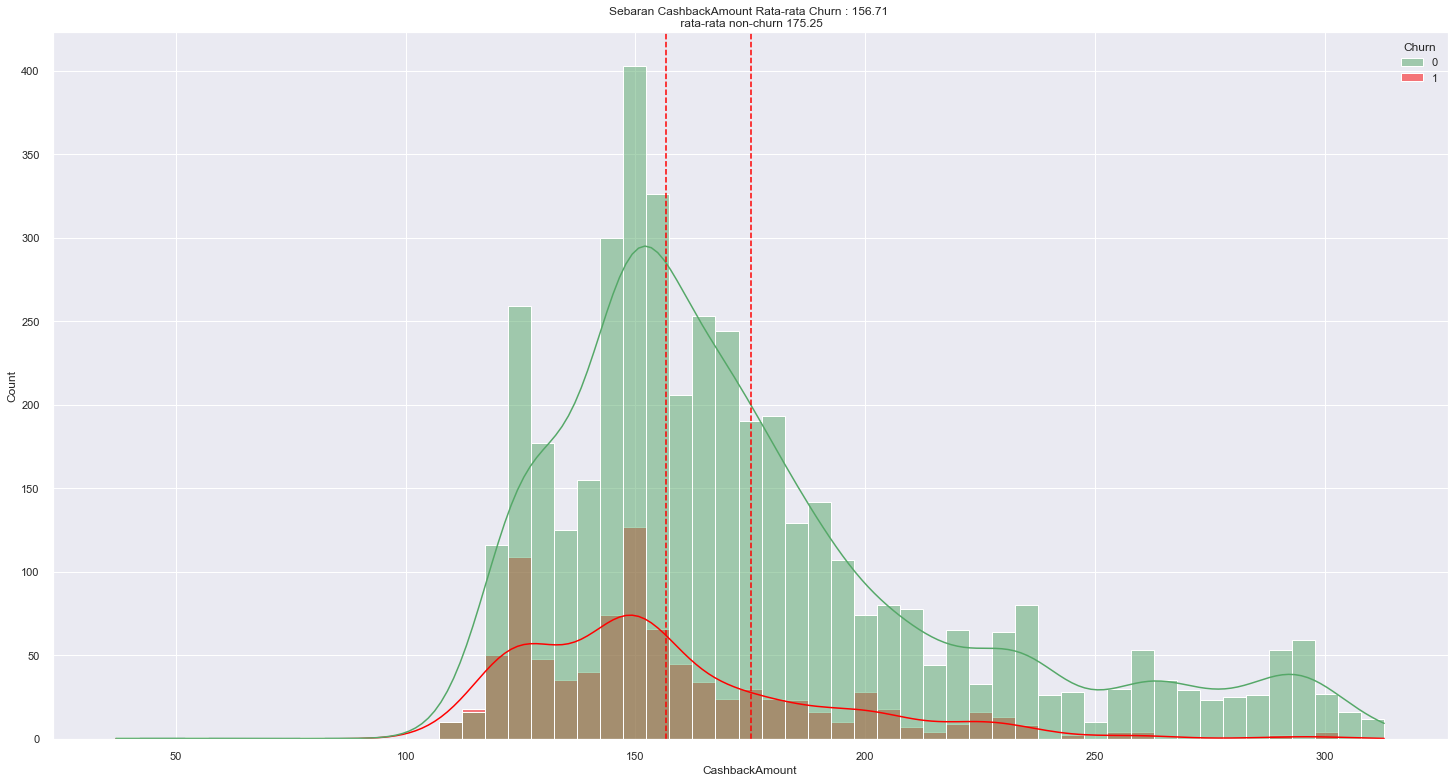

Perbedaan signifikan karena p-value sebesar 1.9342296876612197e-32


In [430]:
for col in using_anova:
    plotperbandingananova(ecom, col)

In [431]:
feature_selection_ttest

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder']

In [432]:
feature_selection_anova

['Churn', 'CashbackAmount']

### Menggabungakn nama variabel yang dijadikan feature selection

In [433]:
feature_selection = feature_selection_anova + feature_selection_ttest

In [434]:
feature_selection

['Churn',
 'CashbackAmount',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder']

<AxesSubplot:>

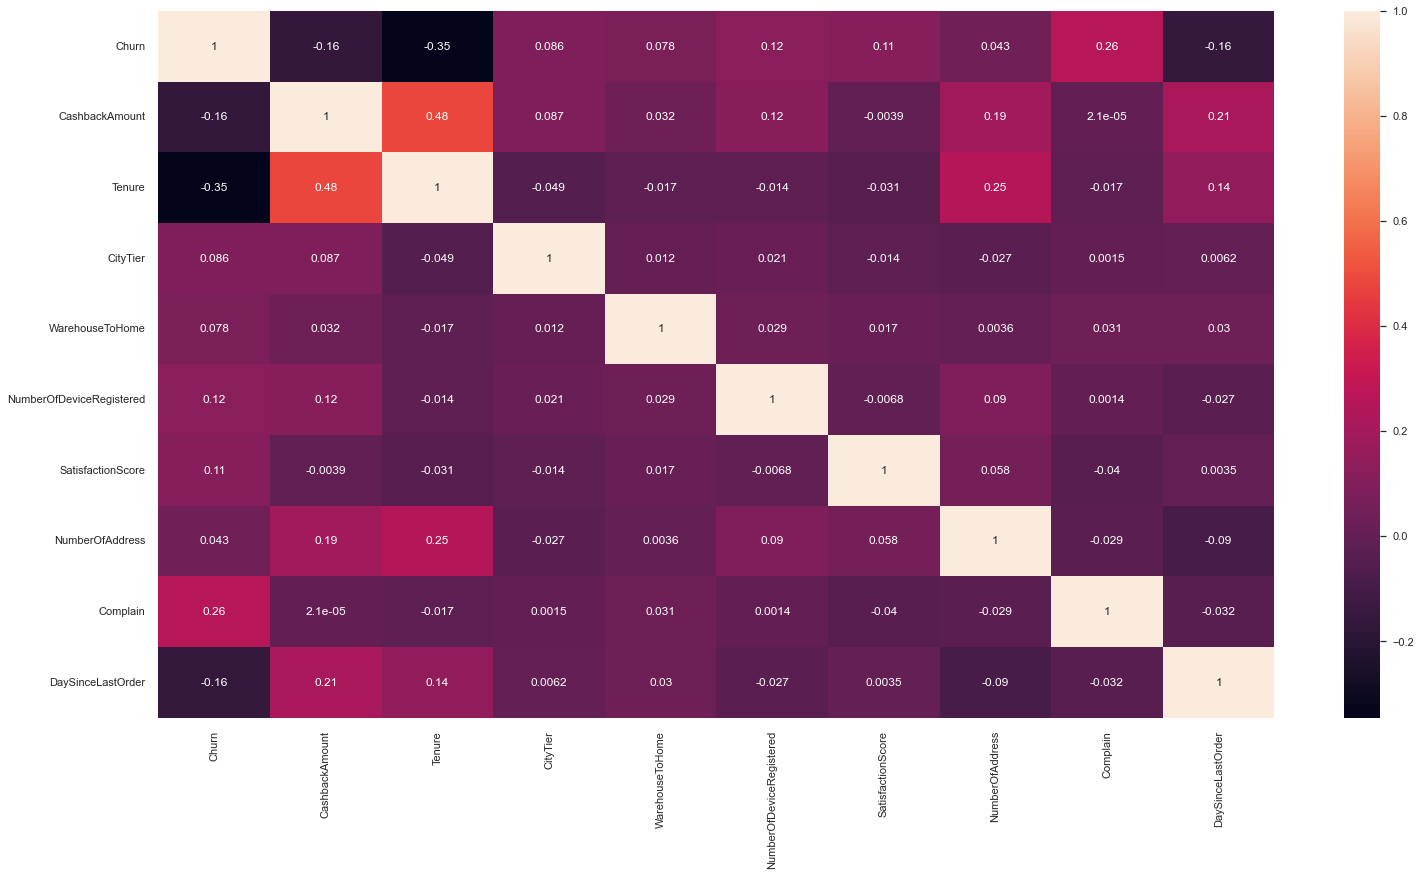

In [435]:
sns.set(rc = {'figure.figsize':(25,13)})
sns.heatmap(ecom[feature_selection].corr(), annot=True)

In [436]:
feature_selection

['Churn',
 'CashbackAmount',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder']

In [437]:
ecom.corr()['Churn'].sort_values(ascending=False)

Churn                          1.000000
Complain                       0.259413
NumberOfDeviceRegistered       0.118839
SatisfactionScore              0.111717
CityTier                       0.086156
WarehouseToHome                0.078365
NumberOfAddress                0.042873
CouponUsed                     0.008505
OrderAmountHikeFromlastYear   -0.000119
HourSpendOnApp                -0.000460
OrderCount                    -0.013445
CustomerID                    -0.015023
DaySinceLastOrder             -0.160745
CashbackAmount                -0.162985
Tenure                        -0.345339
Name: Churn, dtype: float64

Didapatkan hasil dari perbandingan feature selection dan korelasi variabel pada dataset, urutan variabel dari `CouponUsed` hingga `CustomerID` tidak digunakan

# Feature Selection (categorical data)

In [438]:
ecom2 = ecom.copy()

In [439]:
ecom2.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     0.0                Phone         1              8.0   
2       50003      1     0.0                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             0.0                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [440]:
cat = ecom2.select_dtypes('object')
kategorikal = []
for i in cat.columns:
    kategorikal.append(i)

In [441]:
kategorikal

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [442]:
kategorikal2 = [
    'CityTier',
    'Complain',
    'Churn'
]

In [443]:
kategorikal = kategorikal +kategorikal2

In [444]:
kategorikal

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus',
 'CityTier',
 'Complain',
 'Churn']

In [445]:
ecom2[kategorikal]

PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0            Mobile Phone           Debit Card  Female  Laptop & Accessory   
1                   Phone                  UPI    Male              Mobile   
2                   Phone           Debit Card    Male              Mobile   
3                   Phone           Debit Card    Male  Laptop & Accessory   
4                   Phone                   CC    Male              Mobile   
...                   ...                  ...     ...                 ...   
5625             Computer          Credit Card    Male  Laptop & Accessory   
5626         Mobile Phone          Credit Card    Male             Fashion   
5627         Mobile Phone           Debit Card    Male  Laptop & Accessory   
5628             Computer          Credit Card    Male  Laptop & Accessory   
5629         Mobile Phone          Credit Card    Male  Laptop & Accessory   

     MaritalStatus  CityTier  Complain  Churn  
0           Single         3         1      1  
1           Single         1         1      1  
2           Single         1         1      1  
3           Single         3         0      1  
4           Single         1         0      1  
...            ...       ...       ...    ...  
5625       Married         1         0      0  
5626       Married         1         0      0  
5627       Married         1         1      0  
5628       Married         3         0      0  
5629       Married         1         0      0  

[5226 rows x 8 columns]

### Using chi-square

In [446]:
# label encoding for chi-square
for col in kategorikal:
    le = preprocessing.LabelEncoder()
    ecom2[col] = le.fit_transform(ecom2[col])
ecom2[kategorikal].head()

PreferredLoginDevice  PreferredPaymentMode  Gender  PreferedOrderCat  \
0                     1                     4       0                 2   
1                     2                     6       1                 3   
2                     2                     4       1                 3   
3                     2                     4       1                 2   
4                     2                     0       1                 3   

   MaritalStatus  CityTier  Complain  Churn  
0              2         2         1      1  
1              2         0         1      1  
2              2         0         1      1  
3              2         2         0      1  
4              2         0         0      1

In [447]:
X = ecom2[kategorikal].drop(columns=['Churn'], axis=1)
y = ecom2['Churn']

In [448]:
chi_scores = chi2(X, y)

In [449]:
chi_scores

(array([  0.42154141,   1.80207041,   2.13317282,  72.92917515,
         39.42582711,  49.5496961 , 250.94399987]),
 array([5.16168912e-01, 1.79462394e-01, 1.44142124e-01, 1.34386845e-17,
        3.40760017e-10, 1.93409820e-12, 1.61674199e-56]))

Semakin memiliki nilai chi-value yang tinggi maka variabel tersebut semakin penting

<AxesSubplot:>

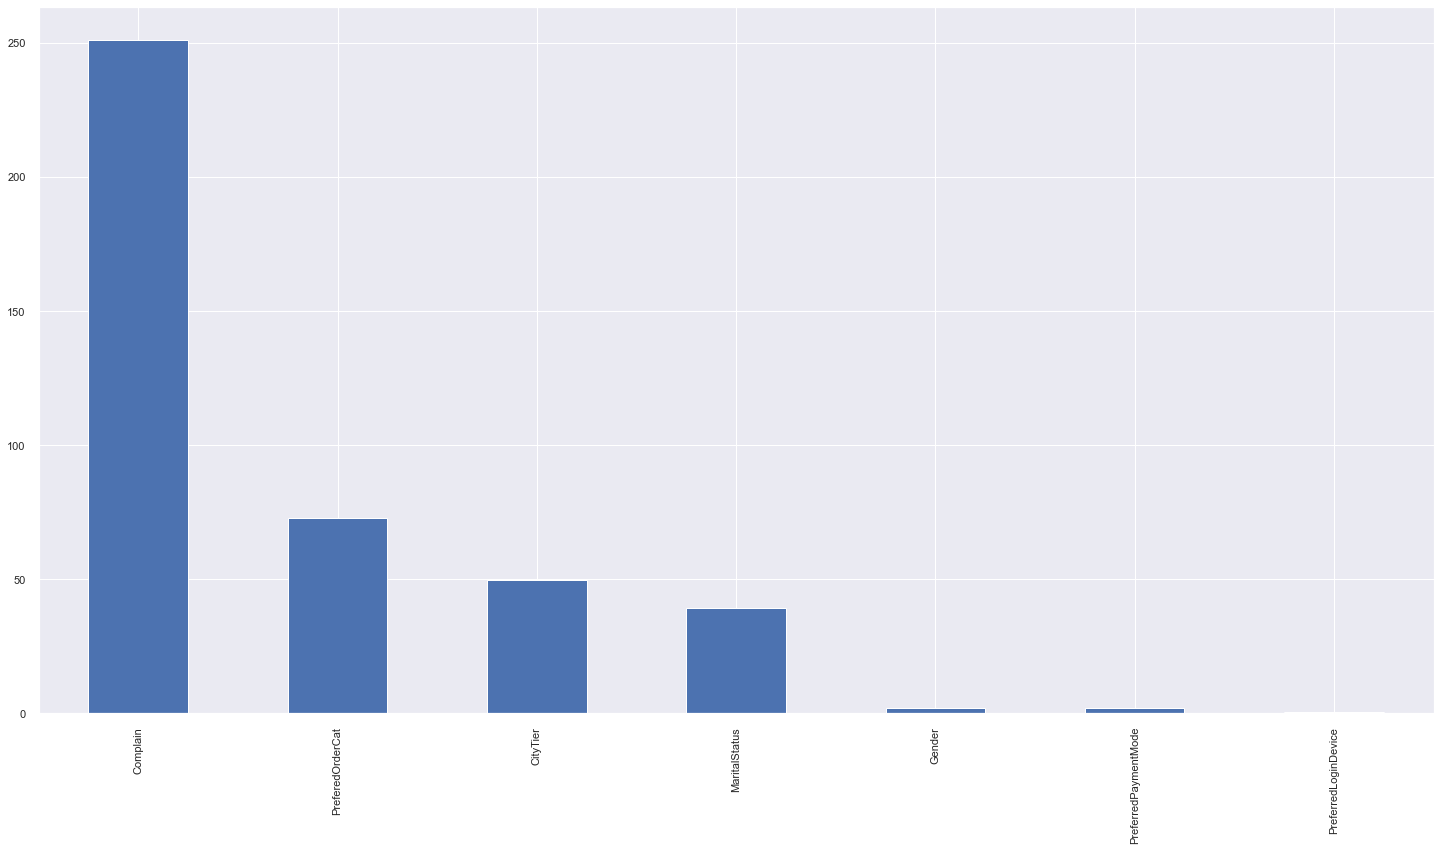

In [450]:
# Higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

jika memiliki p-value lebih dari 0.5 maka dianggap sebagai fitur yang tidak penting dan dibuang

<AxesSubplot:>

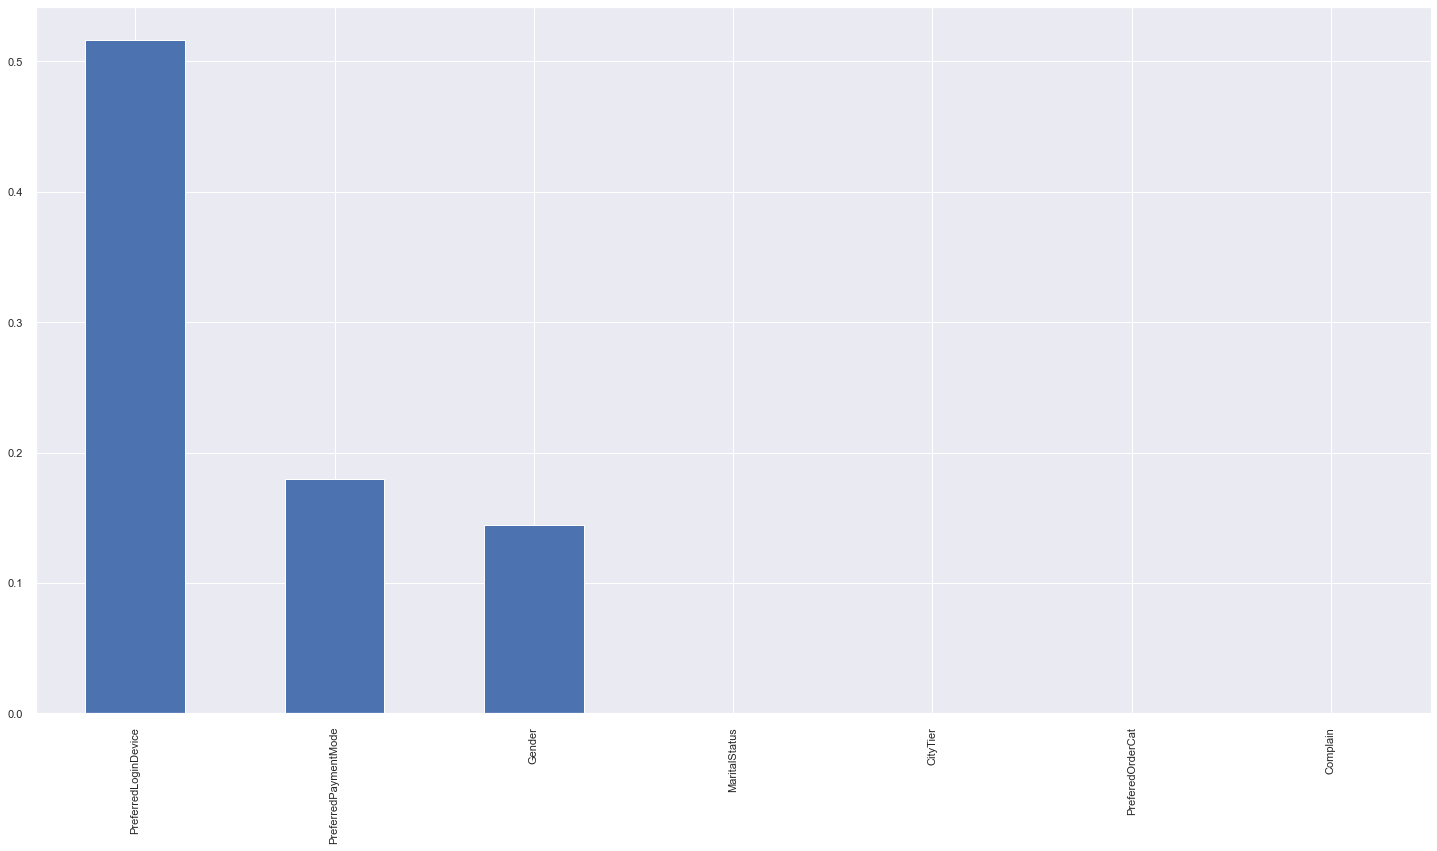

In [451]:
# if p-value > 0.5, lower importance
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

In [452]:
kategorikal

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus',
 'CityTier',
 'Complain',
 'Churn']

In [453]:
feature_selection_kategorikal = [
    'PreferredPaymentMode',
    'Gender',
    'MaritalStatus',
    'PreferedOrderCat'
]

Dari feature selection yang dilakukan didapatkan feature berikut ini yang akan dipakai untuk modeling

In [454]:
feature_selection

['Churn',
 'CashbackAmount',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder']

In [455]:
feature = feature_selection + feature_selection_kategorikal

In [456]:
feature

['Churn',
 'CashbackAmount',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'PreferredPaymentMode',
 'Gender',
 'MaritalStatus',
 'PreferedOrderCat']

# Categorical handling

Pada handling feature kategorikal disini saya menggunakan onehot encoding dan menggunakan label encoder

In [457]:
ecom[feature].head()

Churn  CashbackAmount  Tenure  CityTier  WarehouseToHome  \
0      1          159.93     4.0         3              6.0   
1      1          120.90     0.0         1              8.0   
2      1          120.28     0.0         1             30.0   
3      1          134.07     0.0         3             15.0   
4      1          129.60     0.0         1             12.0   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                         3                  2                9         1   
1                         4                  3                7         1   
2                         4                  3                6         1   
3                         4                  5                8         0   
4                         3                  5                3         0   

   DaySinceLastOrder PreferredPaymentMode  Gender MaritalStatus  \
0                5.0           Debit Card  Female        Single   
1                0.0                  UPI    Male        Single   
2                3.0           Debit Card    Male        Single   
3                3.0           Debit Card    Male        Single   
4                3.0                   CC    Male        Single   

     PreferedOrderCat  
0  Laptop & Accessory  
1              Mobile  
2              Mobile  
3  Laptop & Accessory  
4              Mobile

In [458]:
for col in feature:
    print(col, ": ", ecom[col].nunique())

Churn :  2
CashbackAmount :  2415
Tenure :  32
CityTier :  3
WarehouseToHome :  32
NumberOfDeviceRegistered :  6
SatisfactionScore :  5
NumberOfAddress :  11
Complain :  2
DaySinceLastOrder :  15
PreferredPaymentMode :  7
Gender :  2
MaritalStatus :  3
PreferedOrderCat :  6


Categorical Handling sebagai berikut:
- OneHot encoding:
    - Gender
    - Marital Status
- Label Encoder:
    - PreferredPaymentMode 
    - PreferedOrderCat

In [459]:
onehot = [
    'Gender',
    'MaritalStatus'
]
labelenc = [
    'PreferredPaymentMode',
    'PreferedOrderCat'
]

In [460]:
features = ecom[feature]

In [461]:
features[labelenc]

PreferredPaymentMode    PreferedOrderCat
0              Debit Card  Laptop & Accessory
1                     UPI              Mobile
2              Debit Card              Mobile
3              Debit Card  Laptop & Accessory
4                      CC              Mobile
...                   ...                 ...
5625          Credit Card  Laptop & Accessory
5626          Credit Card             Fashion
5627           Debit Card  Laptop & Accessory
5628          Credit Card  Laptop & Accessory
5629          Credit Card  Laptop & Accessory

[5226 rows x 2 columns]

In [462]:
# Label Encoding
features[labelenc] = features[labelenc].apply(preprocessing.LabelEncoder().fit_transform)
# onehot
features = pd.get_dummies(features, columns=onehot)

In [463]:
features.head()

Churn  CashbackAmount  Tenure  CityTier  WarehouseToHome  \
0      1          159.93     4.0         3              6.0   
1      1          120.90     0.0         1              8.0   
2      1          120.28     0.0         1             30.0   
3      1          134.07     0.0         3             15.0   
4      1          129.60     0.0         1             12.0   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                         3                  2                9         1   
1                         4                  3                7         1   
2                         4                  3                6         1   
3                         4                  5                8         0   
4                         3                  5                3         0   

   DaySinceLastOrder  PreferredPaymentMode  PreferedOrderCat  Gender_Female  \
0                5.0                     4                 2              1   
1                0.0                     6                 3              0   
2                3.0                     4                 3              0   
3                3.0                     4                 2              0   
4                3.0                     0                 3              0   

   Gender_Male  MaritalStatus_Divorced  MaritalStatus_Married  \
0            0                       0                      0   
1            1                       0                      0   
2            1                       0                      0   
3            1                       0                      0   
4            1                       0                      0   

   MaritalStatus_Single  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1

In [464]:
features.shape

(5226, 17)

In [465]:
features['Churn'].value_counts()

0    4324
1     902
Name: Churn, dtype: int64

([<matplotlib.patches.Wedge at 0x1f38b77cf40>,
 [Text(-0.9422135837353779, 0.5676562010799638, 'No Churn'),
  Text(0.942213583735378, -0.5676562010799635, 'Churn')],
 [Text(-0.5139346820374788, 0.3096306551345257, '82.7%'),
  Text(0.5139346820374788, -0.3096306551345255, '17.3%')])

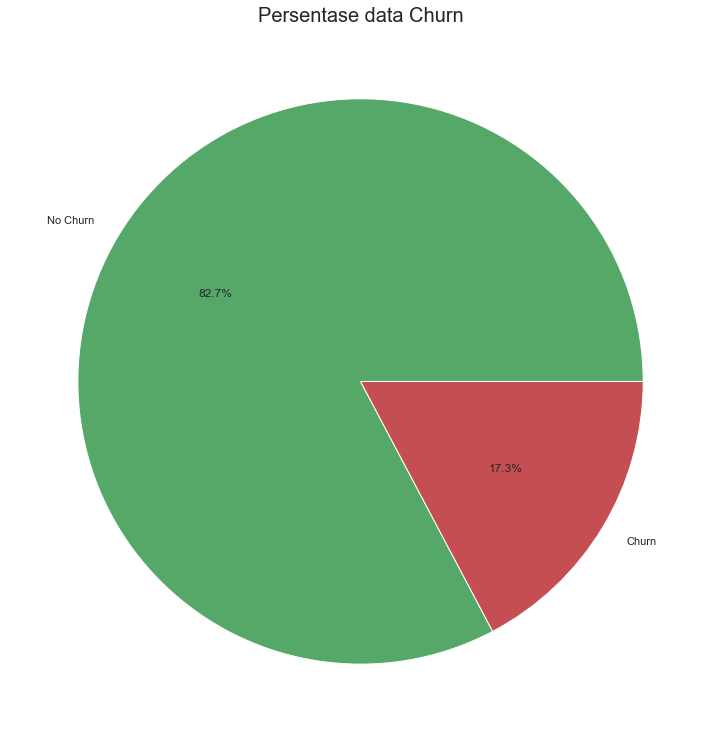

In [466]:
plt.title("Persentase data Churn", fontsize=20)
plt.pie(features['Churn'].value_counts(), labels=['No Churn', 'Churn'],
        autopct='%1.1f%%', colors=['g','r'])

Dari pie chart diatas didapatkan gambaran bahwa data sangat imbalance

### Splitting features and label

In [467]:
y = features["Churn"]
x = features.drop('Churn', axis=1)

In [468]:
x

CashbackAmount  Tenure  CityTier  WarehouseToHome  \
0             159.93     4.0         3              6.0   
1             120.90     0.0         1              8.0   
2             120.28     0.0         1             30.0   
3             134.07     0.0         3             15.0   
4             129.60     0.0         1             12.0   
...              ...     ...       ...              ...   
5625          150.71    10.0         1             30.0   
5626          224.91    13.0         1             13.0   
5627          186.42     1.0         1             11.0   
5628          178.90    23.0         3              9.0   
5629          169.04     8.0         1             15.0   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                            3                  2                9         1   
1                            4                  3                7         1   
2                            4                  3                6         1   
3                            4                  5                8         0   
4                            3                  5                3         0   
...                        ...                ...              ...       ...   
5625                         2                  1                6         0   
5626                         5                  5                6         0   
5627                         2                  4                3         1   
5628                         5                  4                4         0   
5629                         2                  3                4         0   

      DaySinceLastOrder  PreferredPaymentMode  PreferedOrderCat  \
0                   5.0                     4                 2   
1                   0.0                     6                 3   
2                   3.0                     4                 3   
3                   3.0                     4                 2   
4                   3.0                     0                 3   
...                 ...                   ...               ...   
5625                4.0                     3                 2   
5626                0.0                     3                 0   
5627                4.0                     4                 2   
5628                9.0                     3                 2   
5629                3.0                     3                 2   

      Gender_Female  Gender_Male  MaritalStatus_Divorced  \
0                 1            0                       0   
1                 0            1                       0   
2                 0            1                       0   
3                 0            1                       0   
4                 0            1                       0   
...             ...          ...                     ...   
5625              0            1                       0   
5626              0            1                       0   
5627              0            1                       0   
5628              0            1                       0   
5629              0            1                       0   

      MaritalStatus_Married  MaritalStatus_Single  
0                         0                     1  
1                         0                     1  
2                         0                     1  
3                         0                     1  
4                         0                     1  
...                     ...                   ...  
5625                      1                     0  
5626                      1                     0  
5627                      1                     0  
5628                      1                     0  
5629                      1                     0  

[5226 rows x 16 columns]

### Split data train and data test for validation

In [469]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### Melakukan oversampling menggunakan ADASYN

In [470]:
oversample = ADASYN()
X, Y = oversample.fit_resample(x_train, y_train)

### Perbedaan sebelum melakukan oversampling dan sesudah

In [471]:
Counter(y_train)

Counter({0: 3465, 1: 715})

In [472]:
Counter(Y)

Counter({0: 3465, 1: 3468})

### Standardization

In [473]:
# Melakukan standardization pada data train
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X)
x_data_train_scaled = pd.DataFrame(x_train_scaled, columns=X.columns)

In [474]:
x_data_train_scaled

CashbackAmount    Tenure  CityTier  WarehouseToHome  \
0          -0.574792 -0.396356 -0.733627        -0.244012   
1          -0.579722 -0.014093 -0.733627        -0.244012   
2          -0.780156 -0.778620  1.523913         1.863557   
3          -1.105830 -0.906041 -0.733627        -1.235809   
4           3.057918  2.789173 -0.733627        -0.863885   
...              ...       ...       ...              ...   
6928       -0.460508 -0.778620 -0.733627         1.097372   
6929        0.358066 -0.778620  0.395143         1.998486   
6930        0.265772 -0.854194  1.523913         2.111506   
6931        0.466285 -0.778620 -0.733627         1.644008   
6932        0.351867 -0.778620  0.395143         2.029767   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                    -0.677768          -1.553152        -0.849329 -0.673167   
1                    -2.766661          -0.035891        -0.448267 -0.673167   
2                    -1.722215           1.481371        -0.448267 -0.673167   
3                    -0.677768          -0.794522        -0.047204 -0.673167   
4                     0.366679          -1.553152        -0.047204  1.485514   
...                        ...                ...              ...       ...   
6928                  0.366679          -0.794522        -0.448267  1.485514   
6929                  0.366679          -1.553152        -0.448267  1.485514   
6930                 -0.677768          -1.553152        -0.849329 -0.673167   
6931                  0.366679          -0.794522        -0.448267  1.485514   
6932                  0.366679          -1.553152        -0.448267  1.485514   

      DaySinceLastOrder  PreferredPaymentMode  PreferedOrderCat  \
0              1.418192              0.400768         -0.294837   
1             -0.501341             -0.317197         -0.294837   
2             -0.821264             -1.753127          1.167849   
3             -0.501341             -2.471092          0.436506   
4             -0.181419              0.400768         -1.026180   
...                 ...                   ...               ...   
6928          -0.472520             -0.317197          1.167849   
6929           1.057594              0.400768         -0.294837   
6930           1.738115              1.118733         -1.757523   
6931           1.436515             -0.317197         -0.294837   
6932           1.245945              0.400768         -0.294837   

      Gender_Female  Gender_Male  MaritalStatus_Divorced  \
0          1.503170    -1.115208               -0.328693   
1         -0.665261     0.896694               -0.328693   
2         -0.665261     0.896694               -0.328693   
3          1.503170    -1.115208               -0.328693   
4          1.503170    -1.115208               -0.328693   
...             ...          ...                     ...   
6928      -0.665261     0.896694               -0.328693   
6929      -0.665261     0.896694               -0.328693   
6930      -0.665261    -1.115208               -0.328693   
6931      -0.665261     0.896694               -0.328693   
6932      -0.665261     0.896694               -0.328693   

      MaritalStatus_Married  MaritalStatus_Single  
0                 -0.784430              1.471650  
1                  1.274811             -0.679509  
2                 -0.784430              1.471650  
3                  1.274811             -0.679509  
4                 -0.784430              1.471650  
...                     ...                   ...  
6928              -0.784430             -0.679509  
6929              -0.784430             -0.679509  
6930              -0.784430             -0.679509  
6931              -0.784430             -0.679509  
6932              -0.784430             -0.679509  

[6933 rows x 16 columns]

# Modeling

### AutoML using Pycaret

![Pycaret](ecom_pycaret.jpg)

sebelumnya sudah menggunakan pycaret dan saya akan mencoba 4 model terbaik menurut pycaret yaitu
- lightgbm
- random forest
- extra trees
- decision tree

# Visualization using pair plot

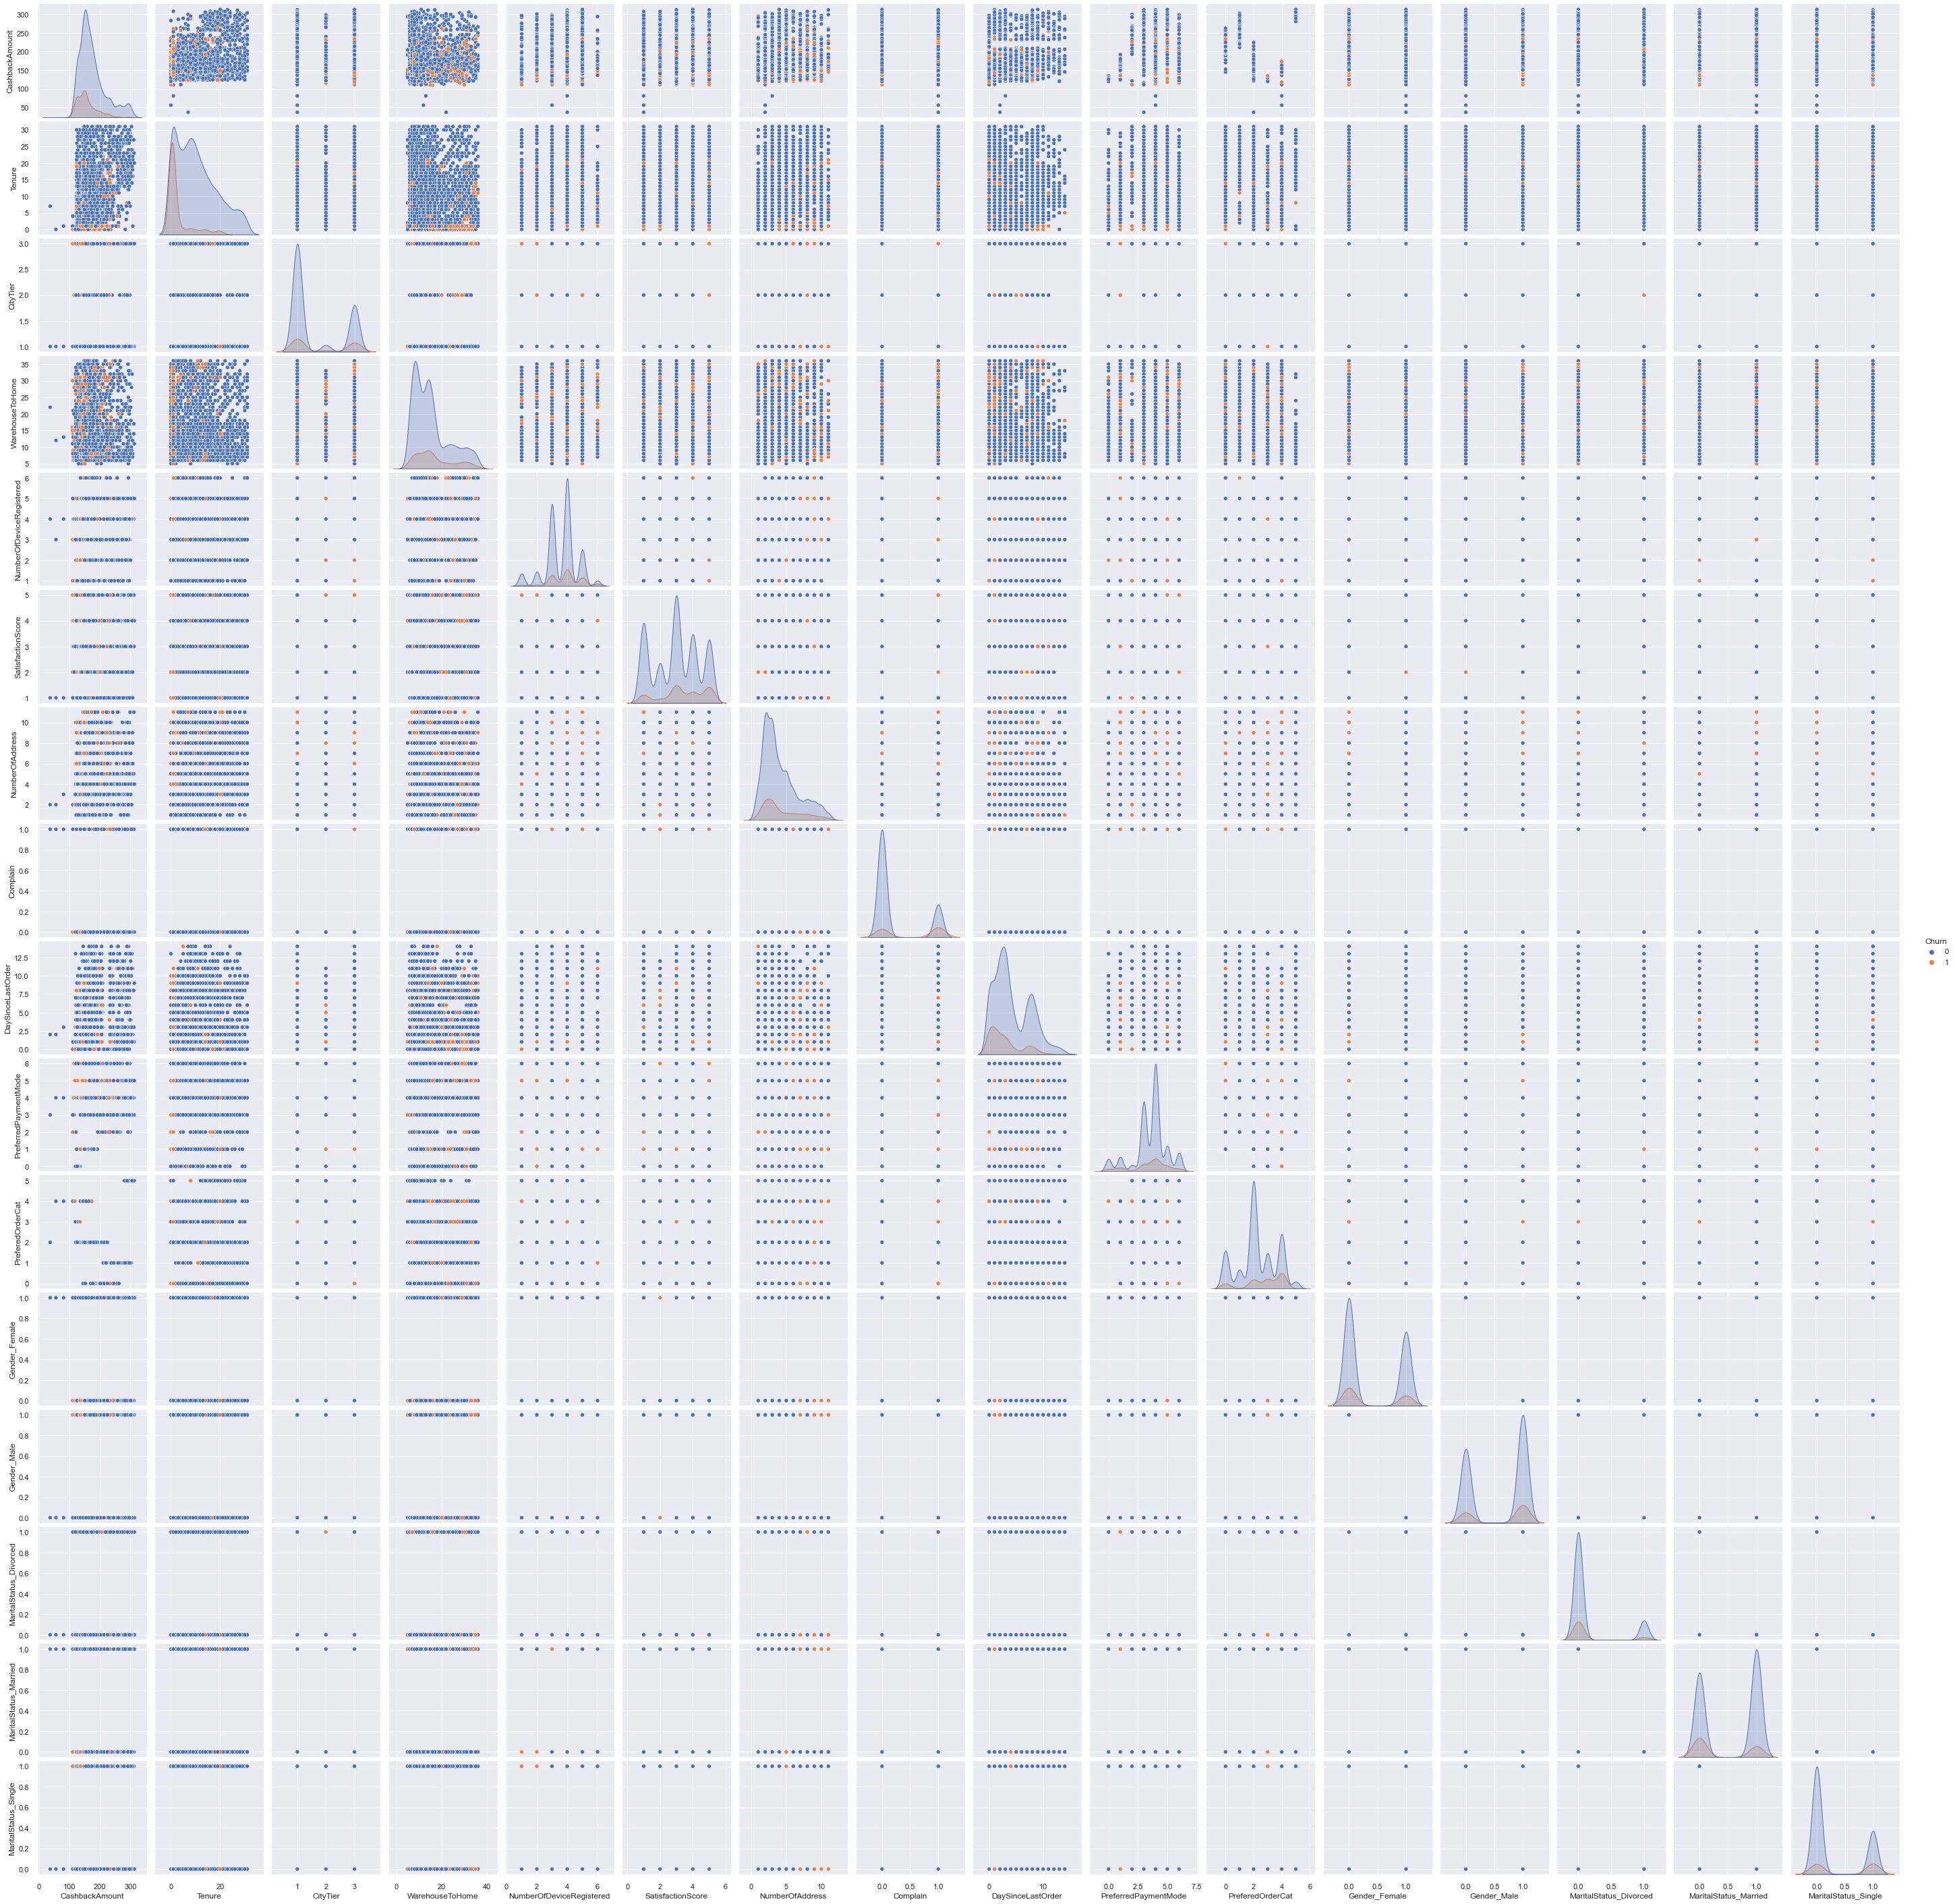

In [475]:
sns.pairplot(features, hue='Churn')

### Result dari pembacaan pairplot

Dari pairplot dapat dilihat bahwa data churn dan non-churn sangat berhimpitan (bertetangga) sehingga basis model yang bisa digunaakn adalah trees atau KNN

Conclusion: Dari autoML yang digunakan (pycaret), dan visualisasi menggunakan pariplot saya akan menggunakan model berbasis tree, karena pada autoML urutan besar 4 model terbaik berbasis tree maka saya akan menggunakan model berikut:
- lightgbm
- random forest
- extra trees
- decision tree

Karena model berbasis tree tidak memerlukan standarisasi atau normalisas maka saya menggunakan data sebelum dilakukan standarisas

In [476]:
# Function untuk classification report
def clasreport(model, Xtrain, Ytrain, Xtest, Ytest):
    model.fit(Xtrain, Ytrain)
    prediction_test = model.predict(Xtest)
    print(classification_report(Ytest, prediction_test))
 
# Function Evaluation train dan test untuk cek apakah model overfitting atau tidak    
def evaluation_train(model, x, y):
    
    model.fit(x,y)
    prediction_test = model.predict(x)
    confu = metrics.confusion_matrix(y, prediction_test)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confu, display_labels= [False, True])
    cm_display.plot()
    
    print(f'TRAIN {model}')
    print(f'Accuracy Score {model} {accuracy_score(y, prediction_test)}')
    print(f'Recall Score {model} {recall_score(y, prediction_test)}')
    print(f'Precision Score {model} {precision_score(y, prediction_test)}')
    print(f'F1 Score {model} {f1_score(y, prediction_test)}')
    print(f'ROC-AUC Score {model} {roc_auc_score(y, prediction_test)}')
    
    plt.show()
    
def evaluation_test(model,Xtrain, Ytrain, x, y):
    model.fit(Xtrain, Ytrain)
    prediction_test = model.predict(x)
    confu = metrics.confusion_matrix(y, prediction_test)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confu, display_labels= [False, True])
    cm_display.plot()
    
    print(f'TEST {model}')
    print(f'Accuracy Score {model} {accuracy_score(y, prediction_test)}')
    print(f'Recall Score {model} {recall_score(y, prediction_test)}')
    print(f'Precision Score {model} {precision_score(y, prediction_test)}')
    print(f'F1 Score {model} {f1_score(y, prediction_test)}')
    print(f'ROC-AUC Score {model} {roc_auc_score(y, prediction_test)}')
    
    plt.show()

--------------------------------------------------------------------------------------------------
TN - True negatives : we predicted a costumer would not churn and they did not churn.

FP - False positives : We predicted a costumer would churn, but they did not.

FN - False negatives : we predicted a costumer would not churn and they actually churn.

TP - True positives : we predicted a costumer churn and they actually churn.

--------------------------------------------------------------------------------------------------

Secara umum, untuk menargetkan pelanggan churn potensial dengan kampanye pemasaran, kami ingin memastikan bahwa kami tidak melewatkan churn tersebut. Namun kami juga tidak ingin melakukan spam kepada pelanggan yang tidak berniat melakukan churn dengan pesan pemasaran yang tidak berguna.

For both those reasons, the two metrics to take in consideration should be the precision and the recall. We can also study the F1 score to maintain a good balance between the precision and the recall.

jadi saya akan memilih model dengan f1-score tertinggi

### Referensi matrix

![Matrix](matrix.jpg)

###  Lightgbm

TRAIN LGBMClassifier(random_state=1)
Accuracy Score LGBMClassifier(random_state=1) 0.9926438771094764
Recall Score LGBMClassifier(random_state=1) 0.9927912341407151
Precision Score LGBMClassifier(random_state=1) 0.9925050446814644
F1 Score LGBMClassifier(random_state=1) 0.9926481187833357
ROC-AUC Score LGBMClassifier(random_state=1) 0.9926438133185539


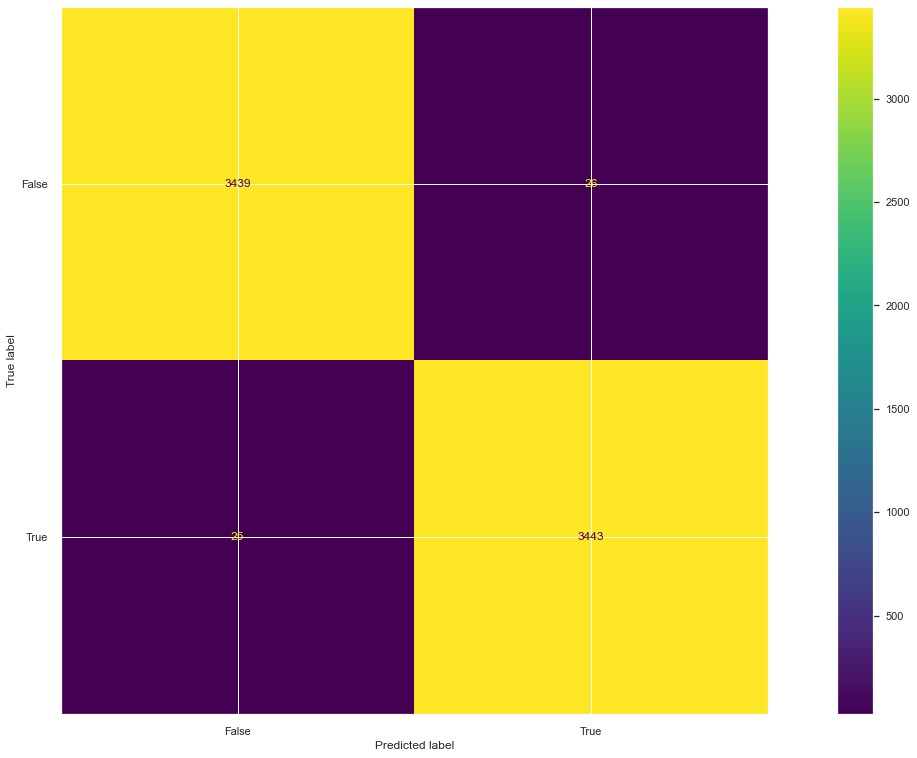

TEST LGBMClassifier(random_state=1)
Accuracy Score LGBMClassifier(random_state=1) 0.9416826003824091
Recall Score LGBMClassifier(random_state=1) 0.8288770053475936
Precision Score LGBMClassifier(random_state=1) 0.842391304347826
F1 Score LGBMClassifier(random_state=1) 0.8355795148247979
ROC-AUC Score LGBMClassifier(random_state=1) 0.8975584095422484


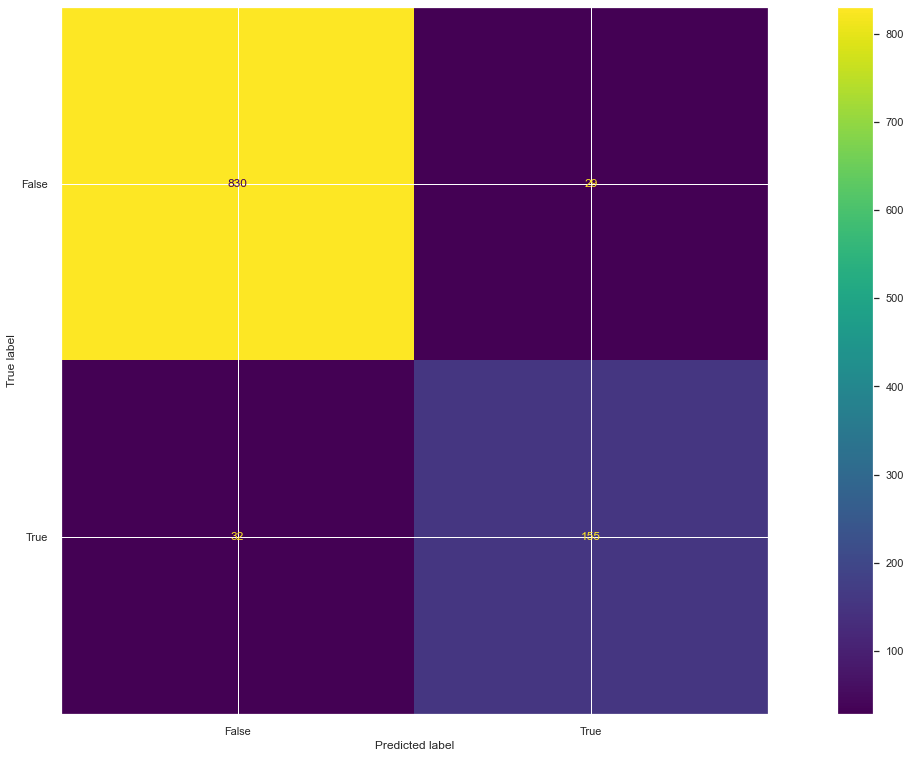

In [477]:
evaluation_train(ltb.LGBMClassifier(random_state=1), X, Y)
evaluation_test(ltb.LGBMClassifier(random_state=1),X, Y, x_test, y_test)

In [478]:
clasreport(ltb.LGBMClassifier(random_state=1), X, Y, x_test, y_test)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       859
           1       0.84      0.83      0.84       187

    accuracy                           0.94      1046
   macro avg       0.90      0.90      0.90      1046
weighted avg       0.94      0.94      0.94      1046



### Random Forest

TRAIN RandomForestClassifier(random_state=1)
Accuracy Score RandomForestClassifier(random_state=1) 1.0
Recall Score RandomForestClassifier(random_state=1) 1.0
Precision Score RandomForestClassifier(random_state=1) 1.0
F1 Score RandomForestClassifier(random_state=1) 1.0
ROC-AUC Score RandomForestClassifier(random_state=1) 1.0


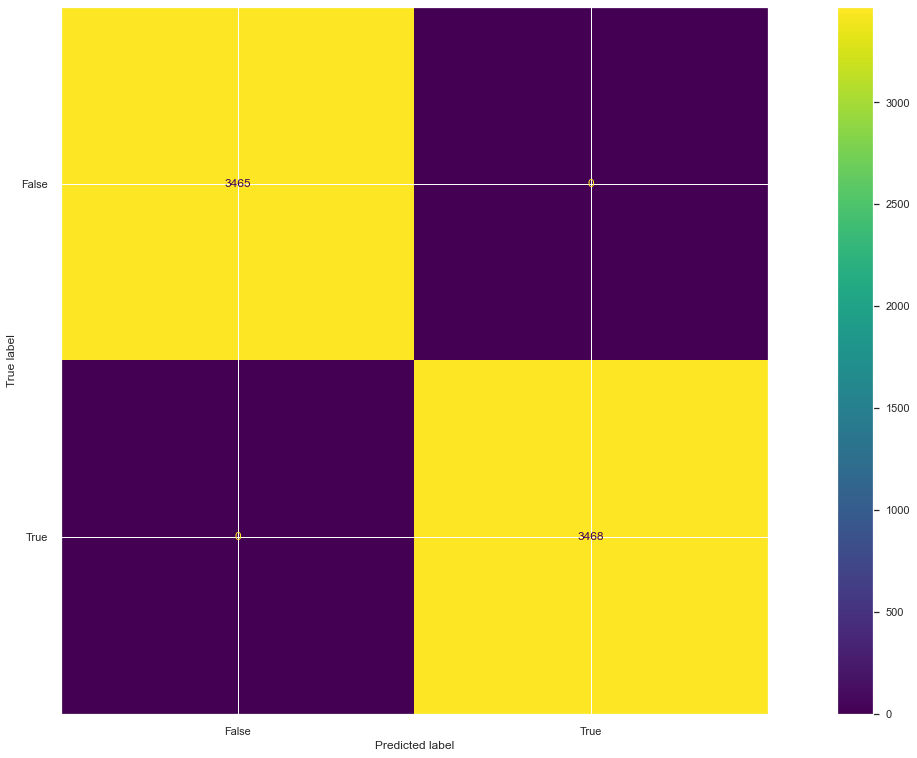

TEST RandomForestClassifier(random_state=1)
Accuracy Score RandomForestClassifier(random_state=1) 0.9560229445506692
Recall Score RandomForestClassifier(random_state=1) 0.8663101604278075
Precision Score RandomForestClassifier(random_state=1) 0.8852459016393442
F1 Score RandomForestClassifier(random_state=1) 0.8756756756756757
ROC-AUC Score RandomForestClassifier(random_state=1) 0.9209315644979549


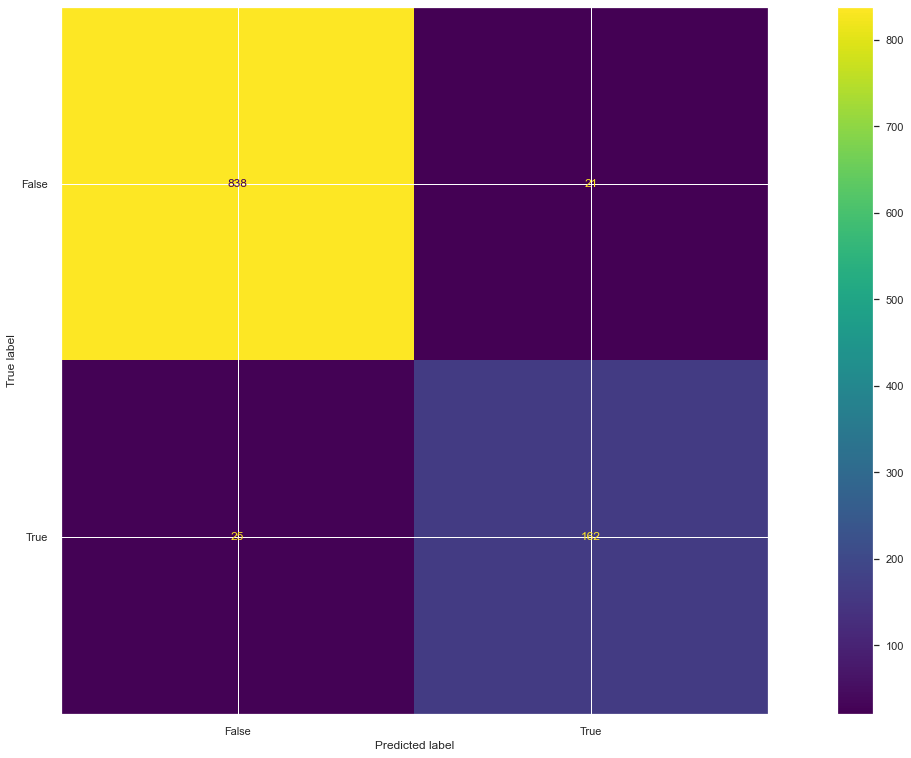

In [479]:
evaluation_train(RandomForestClassifier(random_state=1), X, Y)
evaluation_test(RandomForestClassifier(random_state=1),X, Y, x_test, y_test)

In [480]:
clasreport(RandomForestClassifier(random_state=1), X, Y, x_test, y_test)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       859
           1       0.89      0.87      0.88       187

    accuracy                           0.96      1046
   macro avg       0.93      0.92      0.92      1046
weighted avg       0.96      0.96      0.96      1046



### Extra Trees

TRAIN ExtraTreesClassifier(random_state=1)
Accuracy Score ExtraTreesClassifier(random_state=1) 1.0
Recall Score ExtraTreesClassifier(random_state=1) 1.0
Precision Score ExtraTreesClassifier(random_state=1) 1.0
F1 Score ExtraTreesClassifier(random_state=1) 1.0
ROC-AUC Score ExtraTreesClassifier(random_state=1) 1.0


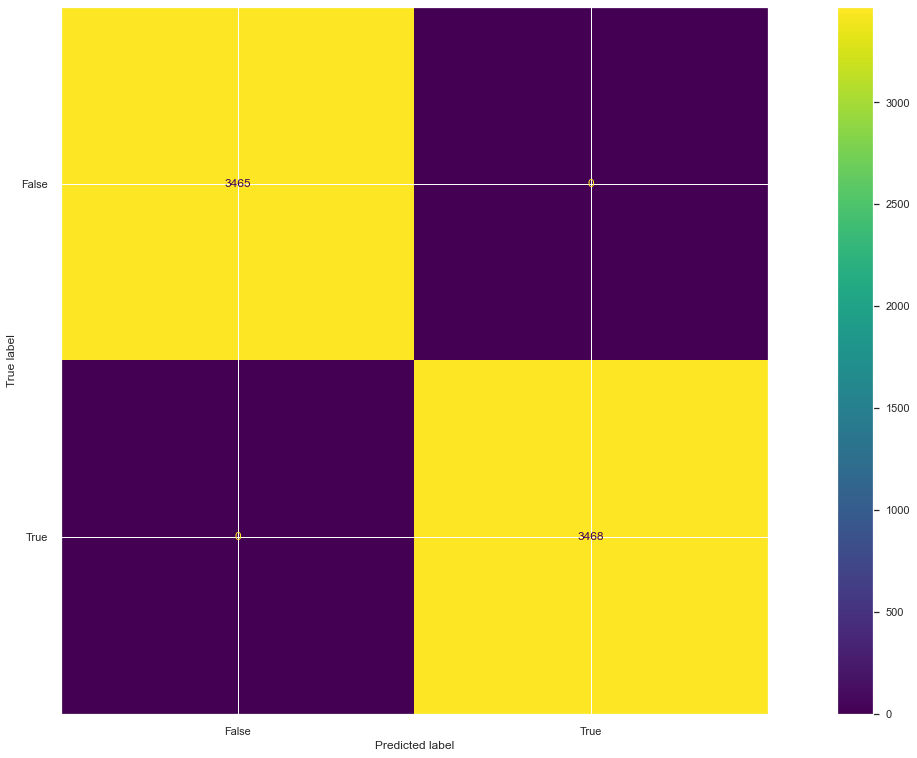

TEST ExtraTreesClassifier(random_state=1)
Accuracy Score ExtraTreesClassifier(random_state=1) 0.9608030592734226
Recall Score ExtraTreesClassifier(random_state=1) 0.839572192513369
Precision Score ExtraTreesClassifier(random_state=1) 0.9345238095238095
F1 Score ExtraTreesClassifier(random_state=1) 0.8845070422535211
ROC-AUC Score ExtraTreesClassifier(random_state=1) 0.913383302310235


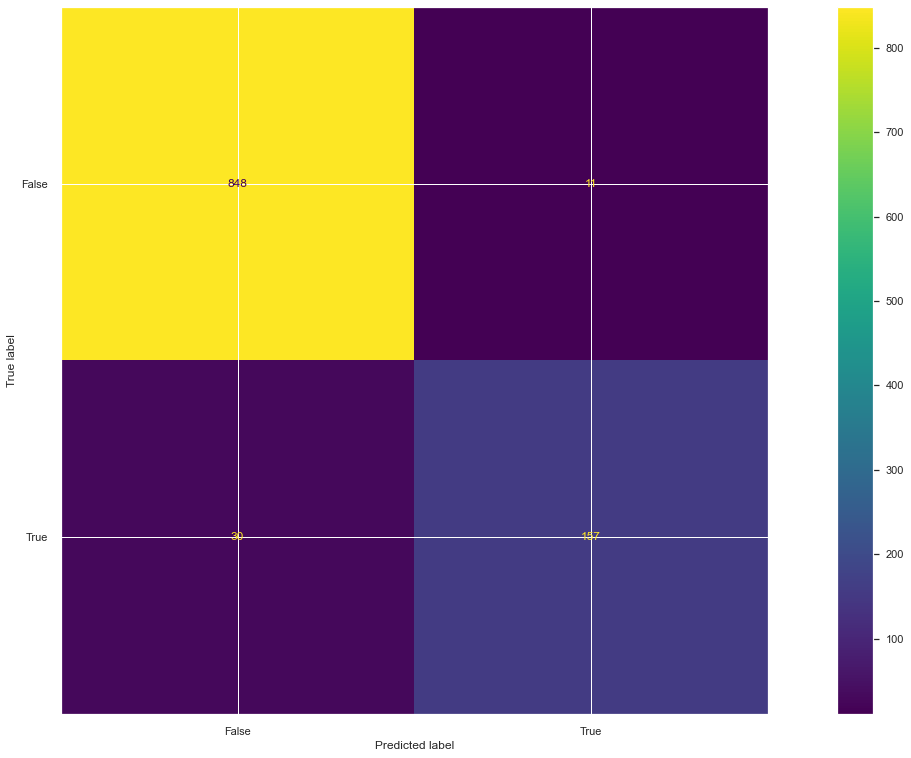

In [481]:
evaluation_train(ExtraTreesClassifier(random_state=1), X, Y)
evaluation_test(ExtraTreesClassifier(random_state=1),X, Y, x_test, y_test)

In [482]:
clasreport(ExtraTreesClassifier(), X, Y, x_test, y_test)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       859
           1       0.92      0.79      0.85       187

    accuracy                           0.95      1046
   macro avg       0.94      0.89      0.91      1046
weighted avg       0.95      0.95      0.95      1046



### Decision Treee

TRAIN DecisionTreeClassifier(random_state=1)
Accuracy Score DecisionTreeClassifier(random_state=1) 1.0
Recall Score DecisionTreeClassifier(random_state=1) 1.0
Precision Score DecisionTreeClassifier(random_state=1) 1.0
F1 Score DecisionTreeClassifier(random_state=1) 1.0
ROC-AUC Score DecisionTreeClassifier(random_state=1) 1.0


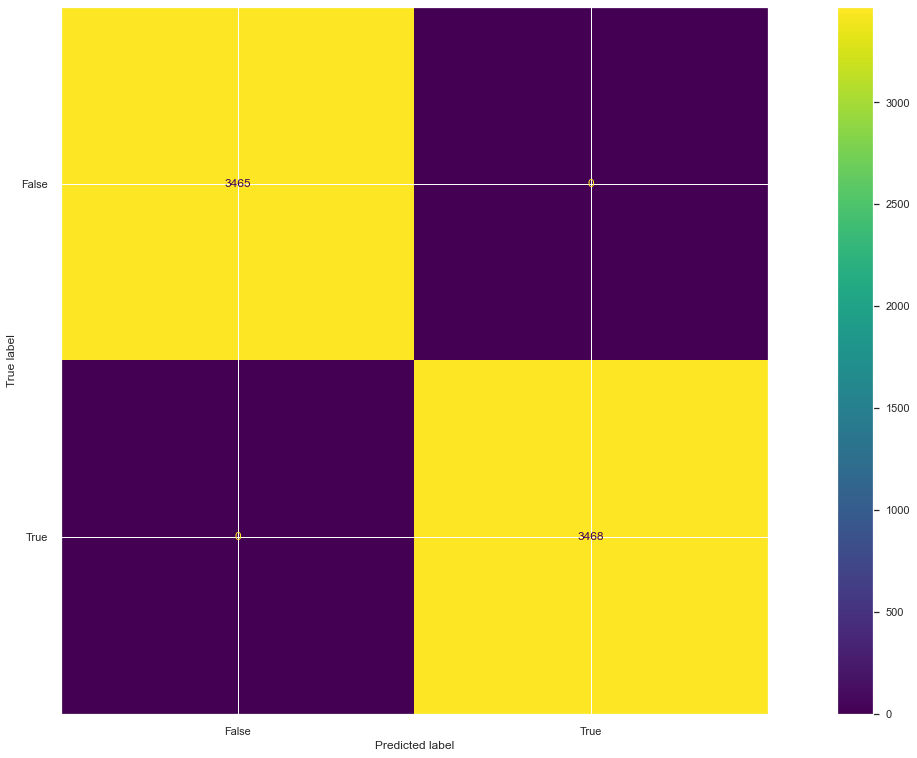

TEST DecisionTreeClassifier(random_state=1)
Accuracy Score DecisionTreeClassifier(random_state=1) 0.9101338432122371
Recall Score DecisionTreeClassifier(random_state=1) 0.786096256684492
Precision Score DecisionTreeClassifier(random_state=1) 0.7313432835820896
F1 Score DecisionTreeClassifier(random_state=1) 0.7577319587628866
ROC-AUC Score DecisionTreeClassifier(random_state=1) 0.8616162307869492


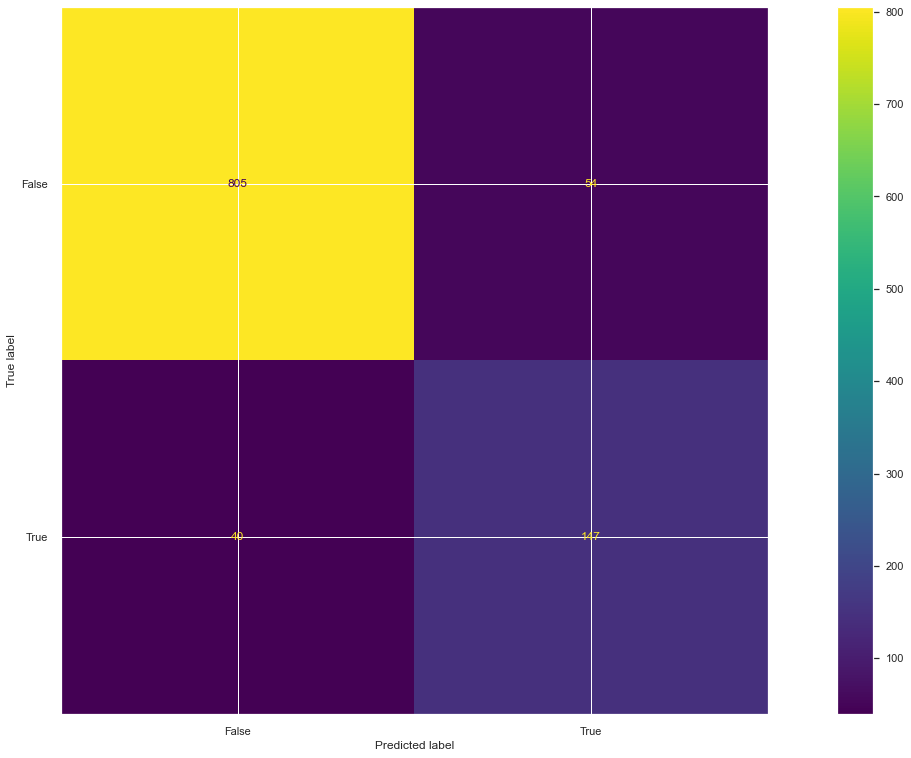

In [483]:
evaluation_train(DecisionTreeClassifier(random_state=1), X, Y)
evaluation_test(DecisionTreeClassifier(random_state=1),X, Y, x_test, y_test)

In [484]:
clasreport(DecisionTreeClassifier(), X, Y, x_test, y_test)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       859
           1       0.76      0.79      0.77       187

    accuracy                           0.92      1046
   macro avg       0.86      0.87      0.86      1046
weighted avg       0.92      0.92      0.92      1046



Kesimpulan Modeling: Random forest memiliki f1-score tertinggi

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Conclusions
So what are these metrics good for?

The traditional Accuracy is a good measure if you have quite balanced datasets and are interested in all types of outputs equally. I like to start with it in any case, as it is intuitive, and dig deeper from there as needed.

Precision is great to focus on if you want to minimize false positives. For example, you build a spam email classifier. You want to see as little spam as possible. But you do not want to miss any important, non-spam emails. In such cases, you may wish to aim for maximizing precision.

Recall is very important in domains such as medical (e.g., identifying cancer), where you really want to minimize the chance of missing positive cases (predicting false negatives). These are typically cases where missing a positive case has a much bigger cost than wrongly classifying something as positive.

Neither precision nor recall is necessarily useful alone, since we rather generally are interested in the overall picture. Accuracy is always good to check as one option. F1-score is another.

F1-score combines precision and recall, and works also for cases where the datasets are imbalanced as it requires both precision and recall to have a reasonable value, as demonstrated by the experiments I showed in this post. Even if you have a small number of positive cases vs negative cases, the formula will weight the metric value down if the precision or recall of the positive class is low.

Besides these, there are various other metrics and ways to explore your results. A popular and very useful approach is also use of ROC- and precision-recall curves. These allow fine-tuning the evaluation thresholds according to what type of error we want to minimize. But that is a different topic to explore.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Random forest

### F1-Score and Visualization

In [485]:
train_scores, test_scores = list(), list()
values = [i for i in range(1,50)]

for i in values:
    model = RandomForestClassifier(max_depth=i)
    
    model.fit(X, Y)
    
    train_yhat = model.predict(X)
    train_acc = f1_score(Y, train_yhat)
    train_scores.append(train_acc)
    
    test_yhat  =model.predict(x_test)
    test_acc = f1_score(y_test,test_yhat)
    test_scores.append(test_acc)
    
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.756, test: 0.565
>2, train: 0.771, test: 0.577
>3, train: 0.815, test: 0.606
>4, train: 0.819, test: 0.612
>5, train: 0.866, test: 0.631
>6, train: 0.897, test: 0.674
>7, train: 0.915, test: 0.712
>8, train: 0.937, test: 0.728
>9, train: 0.960, test: 0.766
>10, train: 0.974, test: 0.788
>11, train: 0.985, test: 0.807
>12, train: 0.992, test: 0.828
>13, train: 0.997, test: 0.859
>14, train: 0.998, test: 0.869
>15, train: 0.999, test: 0.876
>16, train: 1.000, test: 0.872
>17, train: 1.000, test: 0.868
>18, train: 1.000, test: 0.866
>19, train: 1.000, test: 0.877
>20, train: 1.000, test: 0.878
>21, train: 1.000, test: 0.885
>22, train: 1.000, test: 0.874
>23, train: 1.000, test: 0.874
>24, train: 1.000, test: 0.849
>25, train: 1.000, test: 0.878
>26, train: 1.000, test: 0.870
>27, train: 1.000, test: 0.879
>28, train: 1.000, test: 0.877
>29, train: 1.000, test: 0.867
>30, train: 1.000, test: 0.874
>31, train: 1.000, test: 0.865
>32, train: 1.000, test: 0.874
>33, train: 1.000

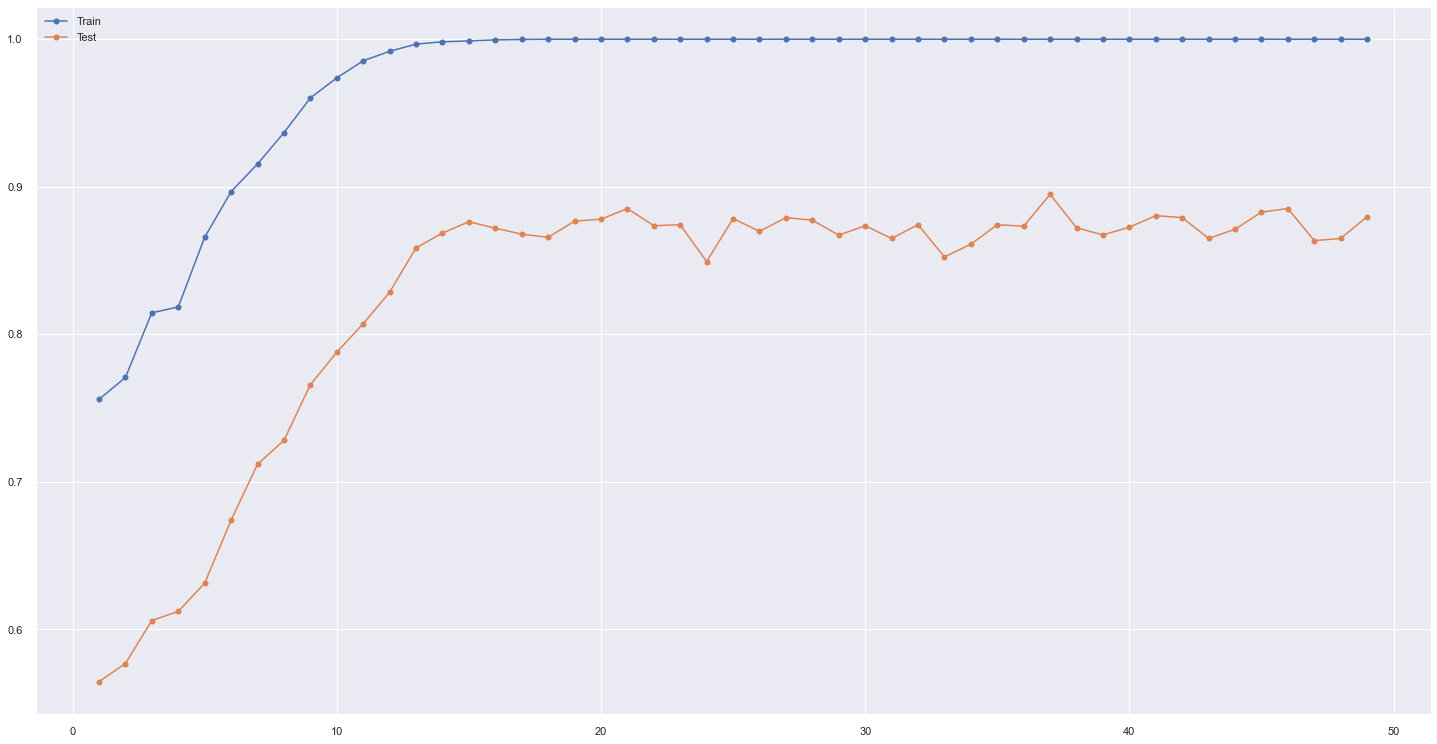

In [486]:
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

# Hyperparameter Tuning - Random Forest

In [487]:
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [i for i in range(1,50)]
n_estimators = [100, 300, 500, 800, 1200]

hyperF = dict(criterion = criterion, n_estimators = n_estimators, max_depth = max_depth)

gridF = RandomizedSearchCV(RandomForestClassifier(random_state=1), hyperF, cv=10, verbose=1,
                           n_jobs=1)
bestF = gridF.fit(X, Y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [488]:
gridF.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=26, n_estimators=1200,
                       random_state=1)

TRAIN RandomForestClassifier(criterion='log_loss', max_depth=26, n_estimators=1200,
                       random_state=1)
Accuracy Score RandomForestClassifier(criterion='log_loss', max_depth=26, n_estimators=1200,
                       random_state=1) 1.0
Recall Score RandomForestClassifier(criterion='log_loss', max_depth=26, n_estimators=1200,
                       random_state=1) 1.0
Precision Score RandomForestClassifier(criterion='log_loss', max_depth=26, n_estimators=1200,
                       random_state=1) 1.0
F1 Score RandomForestClassifier(criterion='log_loss', max_depth=26, n_estimators=1200,
                       random_state=1) 1.0
ROC-AUC Score RandomForestClassifier(criterion='log_loss', max_depth=26, n_estimators=1200,
                       random_state=1) 1.0


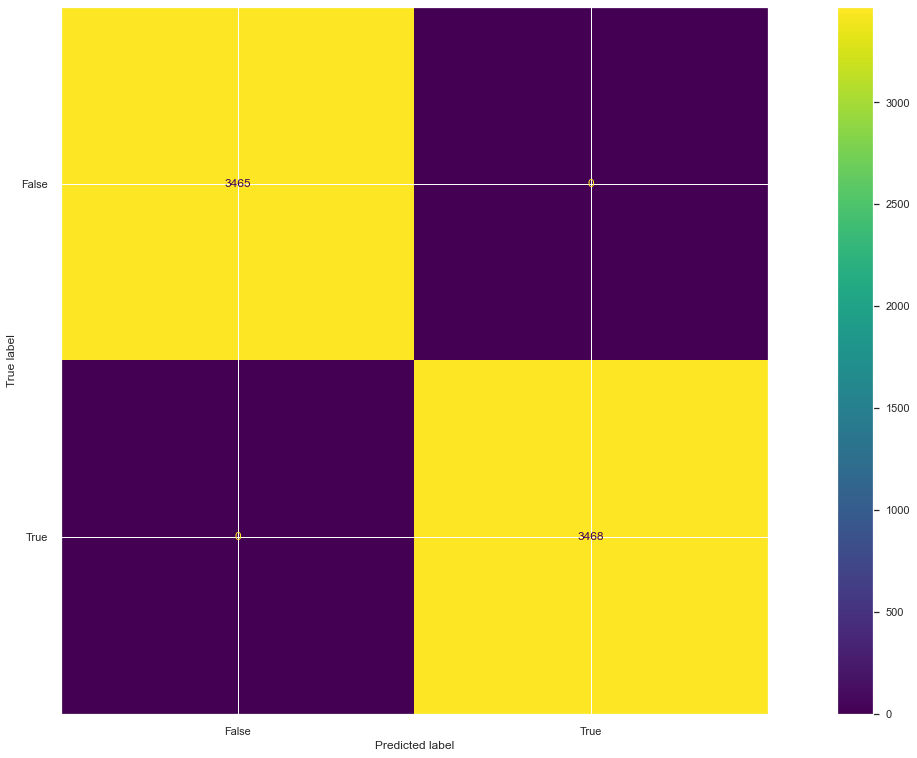

In [489]:
evaluation_train(gridF.best_estimator_, X, Y)

TEST RandomForestClassifier(criterion='log_loss', max_depth=26, n_estimators=1200,
                       random_state=1)
Accuracy Score RandomForestClassifier(criterion='log_loss', max_depth=26, n_estimators=1200,
                       random_state=1) 0.9579349904397706
Recall Score RandomForestClassifier(criterion='log_loss', max_depth=26, n_estimators=1200,
                       random_state=1) 0.8609625668449198
Precision Score RandomForestClassifier(criterion='log_loss', max_depth=26, n_estimators=1200,
                       random_state=1) 0.8994413407821229
F1 Score RandomForestClassifier(criterion='log_loss', max_depth=26, n_estimators=1200,
                       random_state=1) 0.8797814207650274
ROC-AUC Score RandomForestClassifier(criterion='log_loss', max_depth=26, n_estimators=1200,
                       random_state=1) 0.9200039842373609


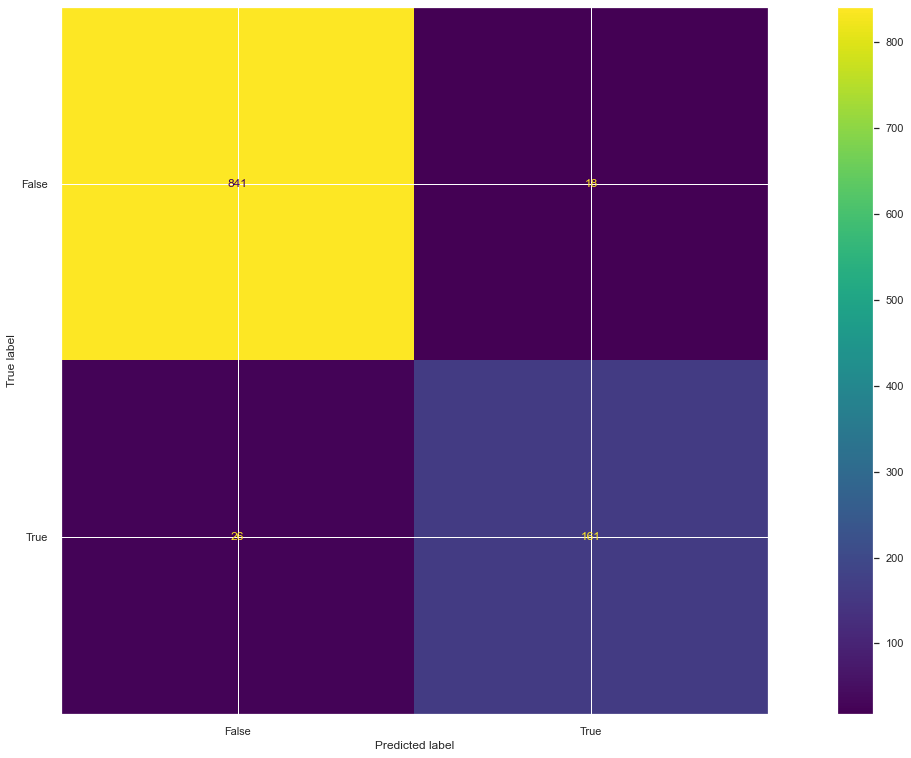

In [490]:
evaluation_test(gridF.best_estimator_, X, Y, x_test, y_test)

In [491]:
clasreport(gridF.best_estimator_, X, Y, x_test, y_test)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       859
           1       0.90      0.86      0.88       187

    accuracy                           0.96      1046
   macro avg       0.93      0.92      0.93      1046
weighted avg       0.96      0.96      0.96      1046



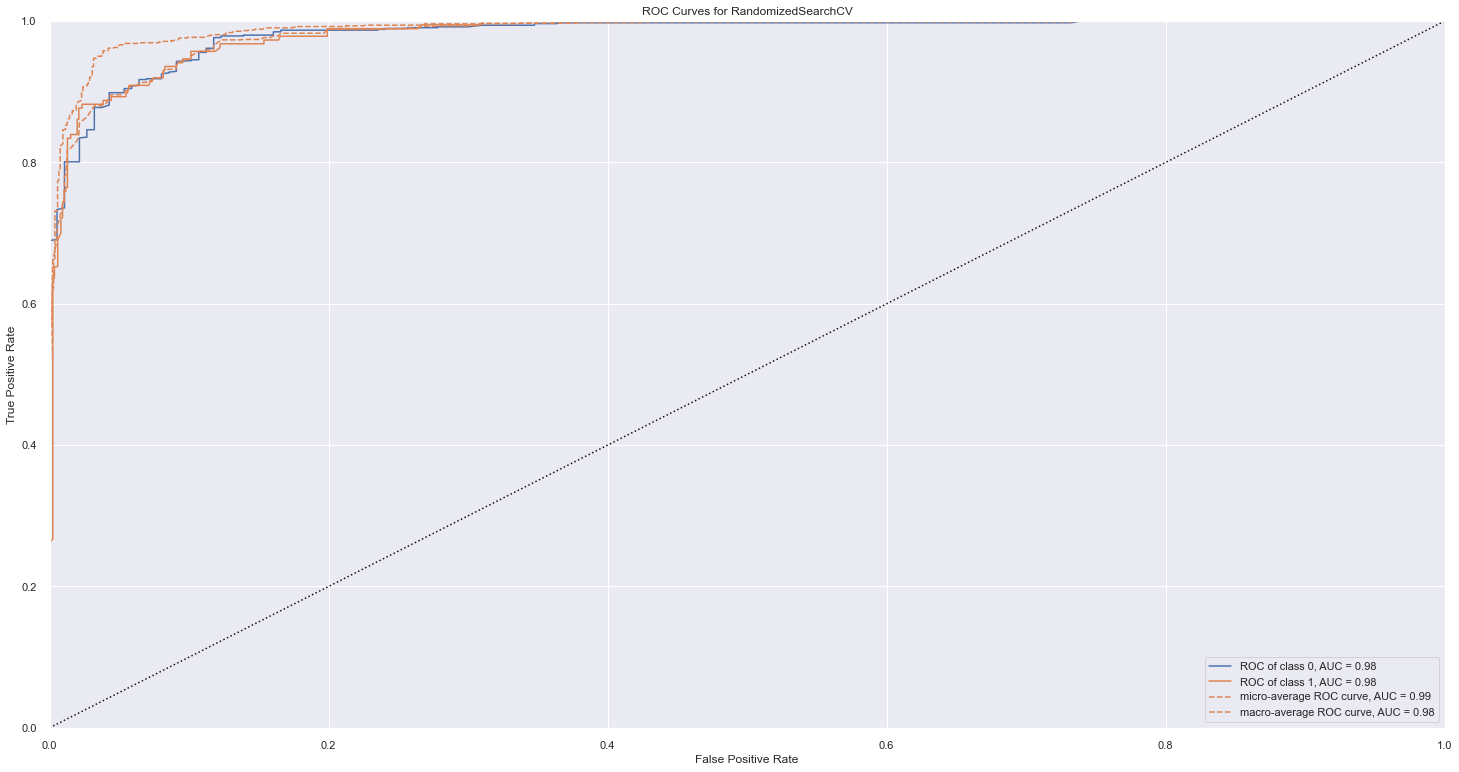

<AxesSubplot:title={'center':'ROC Curves for RandomizedSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [492]:
visualizer = ROCAUC(gridF, classes=gridF.classes_)

visualizer.fit(X, Y)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

Pada saat validasi menggunakan kurva ROCAUC didapatkan bahwa model menunjukkan akurasi yang bagus dan bisa digunakan karena didapatkan jauh diatas random choice (garis patah" berwarna hitam) referensi keputusan mengenai kurva ROCAUC pada link berikut link: https://www.youtube.com/watch?v=OV0ros6SnNo

![ROC-AUC](rocaucref.jpg)

# Model explain / Check Feature Important

In [493]:
rf_cv_intrepreted = dx.Explainer(gridF.best_estimator_, X, Y, label = "Light GBM")

Preparation of a new explainer is initiated

  -> data              : 6933 rows 16 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 6933 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Light GBM
  -> predict function  : <function yhat_proba_default at 0x000001F35ADD2550> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.504, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.364, mean = -0.0038, max = 0.327
  -> model_info        : package sklearn

A new explainer has been created!


In [494]:
rf_cv_intrepreted.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 16/16 [00:50<00:00,  3.16s/it]


### Insight model explain
- Tenure memiliki tren turun sehinggasemakin tinggi nilai Tenure makan probabilitas atau kemungkinan customer tersebut berlabel 0 (non-churn) semakin tinggi
- Number of address memiliki tren naik sehingga semakin banyak alamat yang dimasukkan pada data akan semakin besar kemungkinan untuk customer tersebut berlabel 1(Churn)
- Warehouse to home memiliki tren naik sehingga semakin jauh jarak rumah dengan warehouse semakin besar kemungkinan untuk customer tersebut berlabel 1(Churn)
- Number of device registered tren naik sehingga semakin banyak perangkat yang didaftarkan semakin besar kemungkinan untuk customer tersebut berlabel 1(Churn)
- Complain = orang yang melakukan complain malah mendapat tren naik, sehingga bisa didapatkan insight bahwa customer yang melakukan complain cenderung churn

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

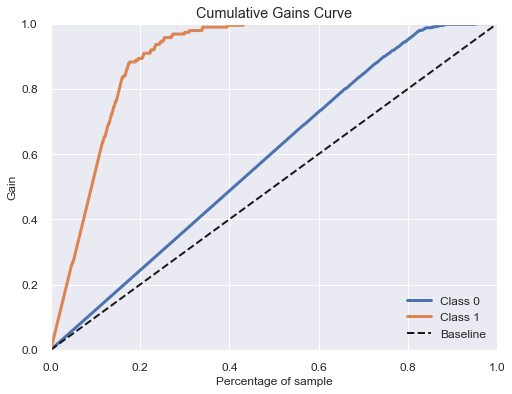

In [495]:
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_test,gridF.predict_proba(x_test),
                                   title='Cumulative Gains Curve', 
                                   ax=None, figsize=(8,6), 
                                   title_fontsize='large', 
                                   text_fontsize='medium')


<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

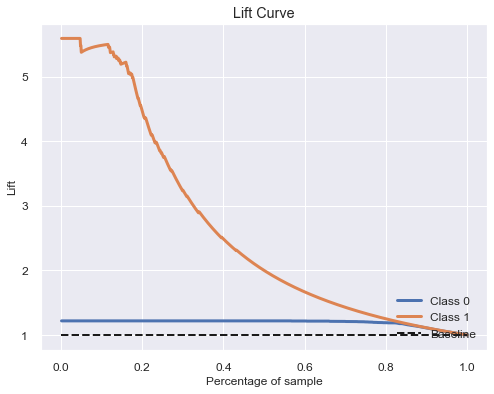

In [496]:
skplt.metrics.plot_lift_curve(y_test,gridF.predict_proba(x_test),
                              title='Lift Curve',
                              ax=None, 
                              figsize=(8,6), 
                              title_fontsize='large', 
                              text_fontsize='medium')

Melihat dari cumulative gains gain tertinggi didapat pada percentage sample 0.4, dan  melihat dari lift curve percentage sample 0.4 memiliki lift diantara 2-3 berarti model yang digunakan cukup baik karena 2-3 kali lipat lebih bagus dibanding dengan random choice

# Insight

- Didapatkan dari beberapa percobaan model, f1-score tertinggi adalah model random forest
- Karena yang ingin diselesaikan adalah masalah bisnis perihal churn pada customer, dan daripada customer yang tidak berpotensi churn malah menjadi churn karena promosi yang tidak tepat maka saya menggunakan false negatif
- Model tersebut menurut saya bisa digunakan karena interprate model (model explain) masuk akal dengan EDA

# Exporting model to pickle file

In [497]:
filename = 'Churn_rf.pkl'
pickle.dump(gridF, open(filename, 'wb'))

# Exporting test data (i will test data using pickle file in trypickle.ipynb)

In [498]:
x_train.to_csv('train_data.csv')
x_test.to_csv('test_data.csv')

In [499]:
y_train.value_counts()

0    3465
1     715
Name: Churn, dtype: int64

Pada train data sudah akurat

In [500]:
y_test.value_counts()

0    859
1    187
Name: Churn, dtype: int64

pada test data masih ada selisih meskipun tidak terlalu banyak, bisa dibandingkan jumlah churn dan non-churn pada file trypickle.ipynb

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------